In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings 
warnings.filterwarnings("ignore")
sns.set_palette("Set3")
from matplotlib import style
style.use("ggplot")

In [2]:
pwd = os.getcwd()

In [3]:
df = pd.read_csv(pwd + "\\hepatitis.data", header= None, names=[
    'class',
    'age',
    'sex',
    'steroid',
    'antiviral',
    'fatigue',
    'malaise',
    'anorexia',
    'liver_bg',
    'liver_firm',
    'spleen',
    'spider',
    'ascites',
    'varices',
    'bili',
    'alk',
    'sgot',
    'alb',
    'protime',
    'histology'])
df.columns = df.columns.str.lower()
df.head(20)

,class,age,sex,steroid,antiviral,fatigue,malaise,anorexia,liver_bg,liver_firm,spleen,spider,ascites,varices,bili,alk,sgot,alb,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1
5,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.90,95,28,4.0,75,1
6,1,51,1,1,2,1,2,1,2,2,1,1,2,2,?,?,?,?,?,1
7,2,23,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,?,?,?,1
8,2,39,1,2,2,1,2,2,2,1,2,2,2,2,0.70,?,48,4.4,?,1
9,2,30,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,120,3.9,?,1


In [4]:
#checking unique values for variables to guide further analysis

def get_unique_values(df):
    unique_values = {}
    for var in df:
        unique_values[var] = df[var].unique()
    return unique_values

print(get_unique_values)

<function get_unique_values at 0x000002059EC43C40>


In [5]:
get_unique_values(df)

{'class': array([2, 1], dtype=int64),
 'age': array([30, 50, 78, 31, 34, 51, 23, 39, 32, 41, 47, 38, 66, 40, 22, 27, 42,
        25, 49, 58, 61, 62, 26, 35, 37, 20, 65, 52, 33, 56, 28, 36, 44, 64,
        45, 57, 24, 67, 59, 60, 48, 54,  7, 69, 72, 70, 46, 53, 43],
       dtype=int64),
 'sex': array([2, 1], dtype=int64),
 'steroid': array(['1', '2', '?'], dtype=object),
 'antiviral': array([2, 1], dtype=int64),
 'fatigue': array(['2', '1', '?'], dtype=object),
 'malaise': array(['2', '1', '?'], dtype=object),
 'anorexia': array(['2', '1', '?'], dtype=object),
 'liver_bg': array(['1', '2', '?'], dtype=object),
 'liver_firm': array(['2', '1', '?'], dtype=object),
 'spleen': array(['2', '1', '?'], dtype=object),
 'spider': array(['2', '1', '?'], dtype=object),
 'ascites': array(['2', '1', '?'], dtype=object),
 'varices': array(['2', '?', '1'], dtype=object),
 'bili': array(['1.00', '0.90', '0.70', '?', '1.30', '2.20', '2.00', '1.20',
        '0.60', '0.40', '0.80', '1.40', '2.30', '0.50',

# Preliminary data inspection

In [6]:
#replace '?' with standard np.nan vals

df = df.replace('?', np.nan)

In [7]:
print(df)

     class  age  sex steroid  antiviral fatigue malaise anorexia liver_bg   
0        2   30    2       1          2       2       2        2        1  \
1        2   50    1       1          2       1       2        2        1   
2        2   78    1       2          2       1       2        2        2   
3        2   31    1     NaN          1       2       2        2        2   
4        2   34    1       2          2       2       2        2        2   
..     ...  ...  ...     ...        ...     ...     ...      ...      ...   
150      1   46    1       2          2       1       1        1        2   
151      2   44    1       2          2       1       2        2        2   
152      2   61    1       1          2       1       1        2        1   
153      2   53    2       1          2       1       2        2        2   
154      1   43    1       2          2       1       2        2        2   

    liver_firm spleen spider ascites varices  bili  alk sgot  alb protime  

In [8]:
get_unique_values(df)

{'class': array([2, 1], dtype=int64),
 'age': array([30, 50, 78, 31, 34, 51, 23, 39, 32, 41, 47, 38, 66, 40, 22, 27, 42,
        25, 49, 58, 61, 62, 26, 35, 37, 20, 65, 52, 33, 56, 28, 36, 44, 64,
        45, 57, 24, 67, 59, 60, 48, 54,  7, 69, 72, 70, 46, 53, 43],
       dtype=int64),
 'sex': array([2, 1], dtype=int64),
 'steroid': array(['1', '2', nan], dtype=object),
 'antiviral': array([2, 1], dtype=int64),
 'fatigue': array(['2', '1', nan], dtype=object),
 'malaise': array(['2', '1', nan], dtype=object),
 'anorexia': array(['2', '1', nan], dtype=object),
 'liver_bg': array(['1', '2', nan], dtype=object),
 'liver_firm': array(['2', '1', nan], dtype=object),
 'spleen': array(['2', '1', nan], dtype=object),
 'spider': array(['2', '1', nan], dtype=object),
 'ascites': array(['2', '1', nan], dtype=object),
 'varices': array(['2', nan, '1'], dtype=object),
 'bili': array(['1.00', '0.90', '0.70', nan, '1.30', '2.20', '2.00', '1.20',
        '0.60', '0.40', '0.80', '1.40', '2.30', '0.50',

In [9]:
print(f"Dataset consists of {df.shape[0]} rows and {df.shape[1]} columns.")
print("Dataset columns: ")
print("---" * 20)
print(df.info())

Dataset consists of 155 rows and 20 columns.
Dataset columns: 
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   class       155 non-null    int64 
 1   age         155 non-null    int64 
 2   sex         155 non-null    int64 
 3   steroid     154 non-null    object
 4   antiviral   155 non-null    int64 
 5   fatigue     154 non-null    object
 6   malaise     154 non-null    object
 7   anorexia    154 non-null    object
 8   liver_bg    145 non-null    object
 9   liver_firm  144 non-null    object
 10  spleen      150 non-null    object
 11  spider      150 non-null    object
 12  ascites     150 non-null    object
 13  varices     150 non-null    object
 14  bili        149 non-null    object
 15  alk         126 non-null    object
 16  sgot        151 non-null    object
 17  alb   

In [10]:
df.isna().sum()

class          0
age            0
sex            0
steroid        1
antiviral      0
fatigue        1
malaise        1
anorexia       1
liver_bg      10
liver_firm    11
spleen         5
spider         5
ascites        5
varices        5
bili           6
alk           29
sgot           4
alb           16
protime       67
histology      0
dtype: int64

43% of protime is missing - need to address this later

steroid, fatigue, malaise, anorexia, liver_bg, liver_firm, spleen, spider, ascites, varices, bili, alk, sgot, alb, protime all listed as object types. Need to convert to int64's

In [11]:
features = ['steroid', 'fatigue', 'malaise', 'anorexia', 'liver_bg', 'liver_firm', 
            'spleen', 'spider', 'ascites', 'varices', 'bili', 'alk', 'sgot', 'alb', 'protime']

In [12]:
for feature in features: 
    df[feature] = pd.to_numeric(df[feature], errors='coerce')

Recode most the data to binary (1 = yes, 0 = no)

*Exception for class; since our outcome of interest is death, we will recode ' died' as 1 and lived as '0'

In [13]:
df['class'] = df['class'].map({1: 1, 2: 0})

In [14]:
for col in ['sex', 'steroid', 'antiviral', 'fatigue', 'malaise', 'anorexia', 'liver_bg', 'liver_firm', 'spleen', 'spider', 'ascites', 'varices', 'histology']:
    df[col] = df[col].replace({2: 1, 1: 0})

imputation with the mode for binary data

In [15]:
get_unique_values(df)

{'class': array([0, 1], dtype=int64),
 'age': array([30, 50, 78, 31, 34, 51, 23, 39, 32, 41, 47, 38, 66, 40, 22, 27, 42,
        25, 49, 58, 61, 62, 26, 35, 37, 20, 65, 52, 33, 56, 28, 36, 44, 64,
        45, 57, 24, 67, 59, 60, 48, 54,  7, 69, 72, 70, 46, 53, 43],
       dtype=int64),
 'sex': array([1, 0], dtype=int64),
 'steroid': array([ 0.,  1., nan]),
 'antiviral': array([1, 0], dtype=int64),
 'fatigue': array([ 1.,  0., nan]),
 'malaise': array([ 1.,  0., nan]),
 'anorexia': array([ 1.,  0., nan]),
 'liver_bg': array([ 0.,  1., nan]),
 'liver_firm': array([ 1.,  0., nan]),
 'spleen': array([ 1.,  0., nan]),
 'spider': array([ 1.,  0., nan]),
 'ascites': array([ 1.,  0., nan]),
 'varices': array([ 1., nan,  0.]),
 'bili': array([1. , 0.9, 0.7, nan, 1.3, 2.2, 2. , 1.2, 0.6, 0.4, 0.8, 1.4, 2.3,
        0.5, 0.3, 4.6, 1.8, 3.5, 4.1, 1.6, 2.8, 1.5, 2.5, 3. , 4.8, 2.4,
        1.7, 1.1, 3.2, 2.9, 8. , 3.9, 1.9, 4.2, 7.6]),
 'alk': array([ 85., 135.,  96.,  46.,  nan,  95.,  78.,  59., 

In [16]:
binary_feats = ['steroid', 'fatigue', 'malaise', 'anorexia', 'liver_bg', 'liver_firm', 'spleen', 'spider', 'ascites', 'varices']

In [17]:
def impute_mode(df, columns):
    for column in columns:
        mode_val = df[column].mode()[0]
        df[column].fillna(mode_val, inplace=True)
    return df 

impute_mode(df, binary_feats)

,class,age,sex,steroid,antiviral,fatigue,malaise,anorexia,liver_bg,liver_firm,spleen,spider,ascites,varices,bili,alk,sgot,alb,protime,histology
0,0,30,1,0.0,1,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,85.0,18.0,4.0,NaN,0
1,0,50,0,0.0,1,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.9,135.0,42.0,3.5,NaN,0
2,0,78,0,1.0,1,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.7,96.0,32.0,4.0,NaN,0
3,0,31,0,1.0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.7,46.0,52.0,4.0,80.0,0
4,0,34,0,1.0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,200.0,4.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,0,1.0,1,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,7.6,NaN,242.0,3.3,50.0,1
151,0,44,0,1.0,1,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.9,126.0,142.0,4.3,NaN,1
152,0,61,0,0.0,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.8,75.0,20.0,4.1,NaN,1
153,0,53,1,0.0,1,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.5,81.0,19.0,4.1,48.0,1


In [18]:
#check to see if vars of interest were imputed correctly
df.isna().sum()

class          0
age            0
sex            0
steroid        0
antiviral      0
fatigue        0
malaise        0
anorexia       0
liver_bg       0
liver_firm     0
spleen         0
spider         0
ascites        0
varices        0
bili           6
alk           29
sgot           4
alb           16
protime       67
histology      0
dtype: int64

imputation with the mean for continuous data

In [19]:
cont_feats = ['bili', 'alk', 'sgot', 'alb', 'protime', 'age']

In [20]:
def impute_mean(df, columns):
    for column in columns:
        mean_val = df[column].mean()
        df[column].fillna(mean_val, inplace=True)
    return df 

impute_mean(df, cont_feats)

,class,age,sex,steroid,antiviral,fatigue,malaise,anorexia,liver_bg,liver_firm,spleen,spider,ascites,varices,bili,alk,sgot,alb,protime,histology
0,0,30,1,0.0,1,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,85.000000,18.0,4.0,61.852273,0
1,0,50,0,0.0,1,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.9,135.000000,42.0,3.5,61.852273,0
2,0,78,0,1.0,1,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.7,96.000000,32.0,4.0,61.852273,0
3,0,31,0,1.0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.7,46.000000,52.0,4.0,80.000000,0
4,0,34,0,1.0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,105.325397,200.0,4.0,61.852273,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,0,1.0,1,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,7.6,105.325397,242.0,3.3,50.000000,1
151,0,44,0,1.0,1,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.9,126.000000,142.0,4.3,61.852273,1
152,0,61,0,0.0,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.8,75.000000,20.0,4.1,61.852273,1
153,0,53,1,0.0,1,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.5,81.000000,19.0,4.1,48.000000,1


Make sure the data shape hasn't changed

In [21]:
print(f"Dataset consists of {df.shape[0]} rows and {df.shape[1]} columns.")

Dataset consists of 155 rows and 20 columns.


Check to see if missing values were imputed successfully

In [22]:
df.isna().sum()

class         0
age           0
sex           0
steroid       0
antiviral     0
fatigue       0
malaise       0
anorexia      0
liver_bg      0
liver_firm    0
spleen        0
spider        0
ascites       0
varices       0
bili          0
alk           0
sgot          0
alb           0
protime       0
histology     0
dtype: int64

# EDA Begins

In [23]:
df.describe(include=np.number).T

,count,mean,std,min,25%,50%,75%,max
class,155.0,0.206452,0.406070,0.0,0.0,0.000000,0.0,1.0
age,155.0,41.200000,12.565878,7.0,32.0,39.000000,50.0,78.0
sex,155.0,0.103226,0.305240,0.0,0.0,0.000000,0.0,1.0
steroid,155.0,0.509677,0.501527,0.0,0.0,1.000000,1.0,1.0
antiviral,155.0,0.845161,0.362923,0.0,1.0,1.000000,1.0,1.0
fatigue,155.0,0.348387,0.478004,0.0,0.0,0.000000,1.0,1.0
malaise,155.0,0.606452,0.490120,0.0,0.0,1.000000,1.0,1.0
anorexia,155.0,0.793548,0.406070,0.0,1.0,1.000000,1.0,1.0
liver_bg,155.0,0.838710,0.368991,0.0,1.0,1.000000,1.0,1.0
liver_firm,155.0,0.612903,0.488665,0.0,0.0,1.000000,1.0,1.0


In [24]:
print(f"Number of duplicated rows: {df.duplicated().sum()}")

Number of duplicated rows: 0


In [25]:
print(f'From this dataset, {len(df[df["class"]==1])} will die')
print(f'From this dataset {len(df[df["class"]==0])} will live')

From this dataset, 32 will die
From this dataset 123 will live


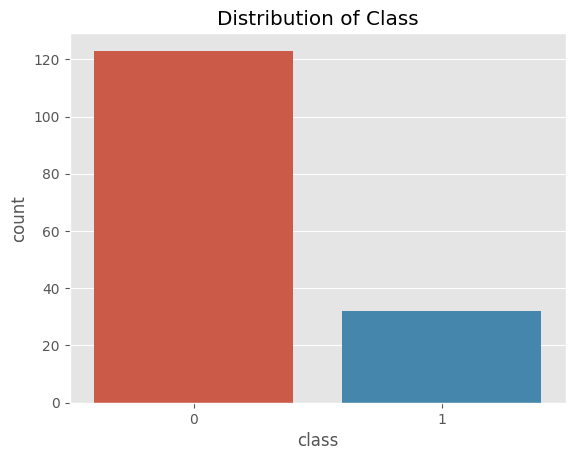

In [26]:
sns.countplot(x='class', data=df)
plt.title('Distribution of Class')
plt.show()

Class imbalance - minority class problem

<AxesSubplot: >

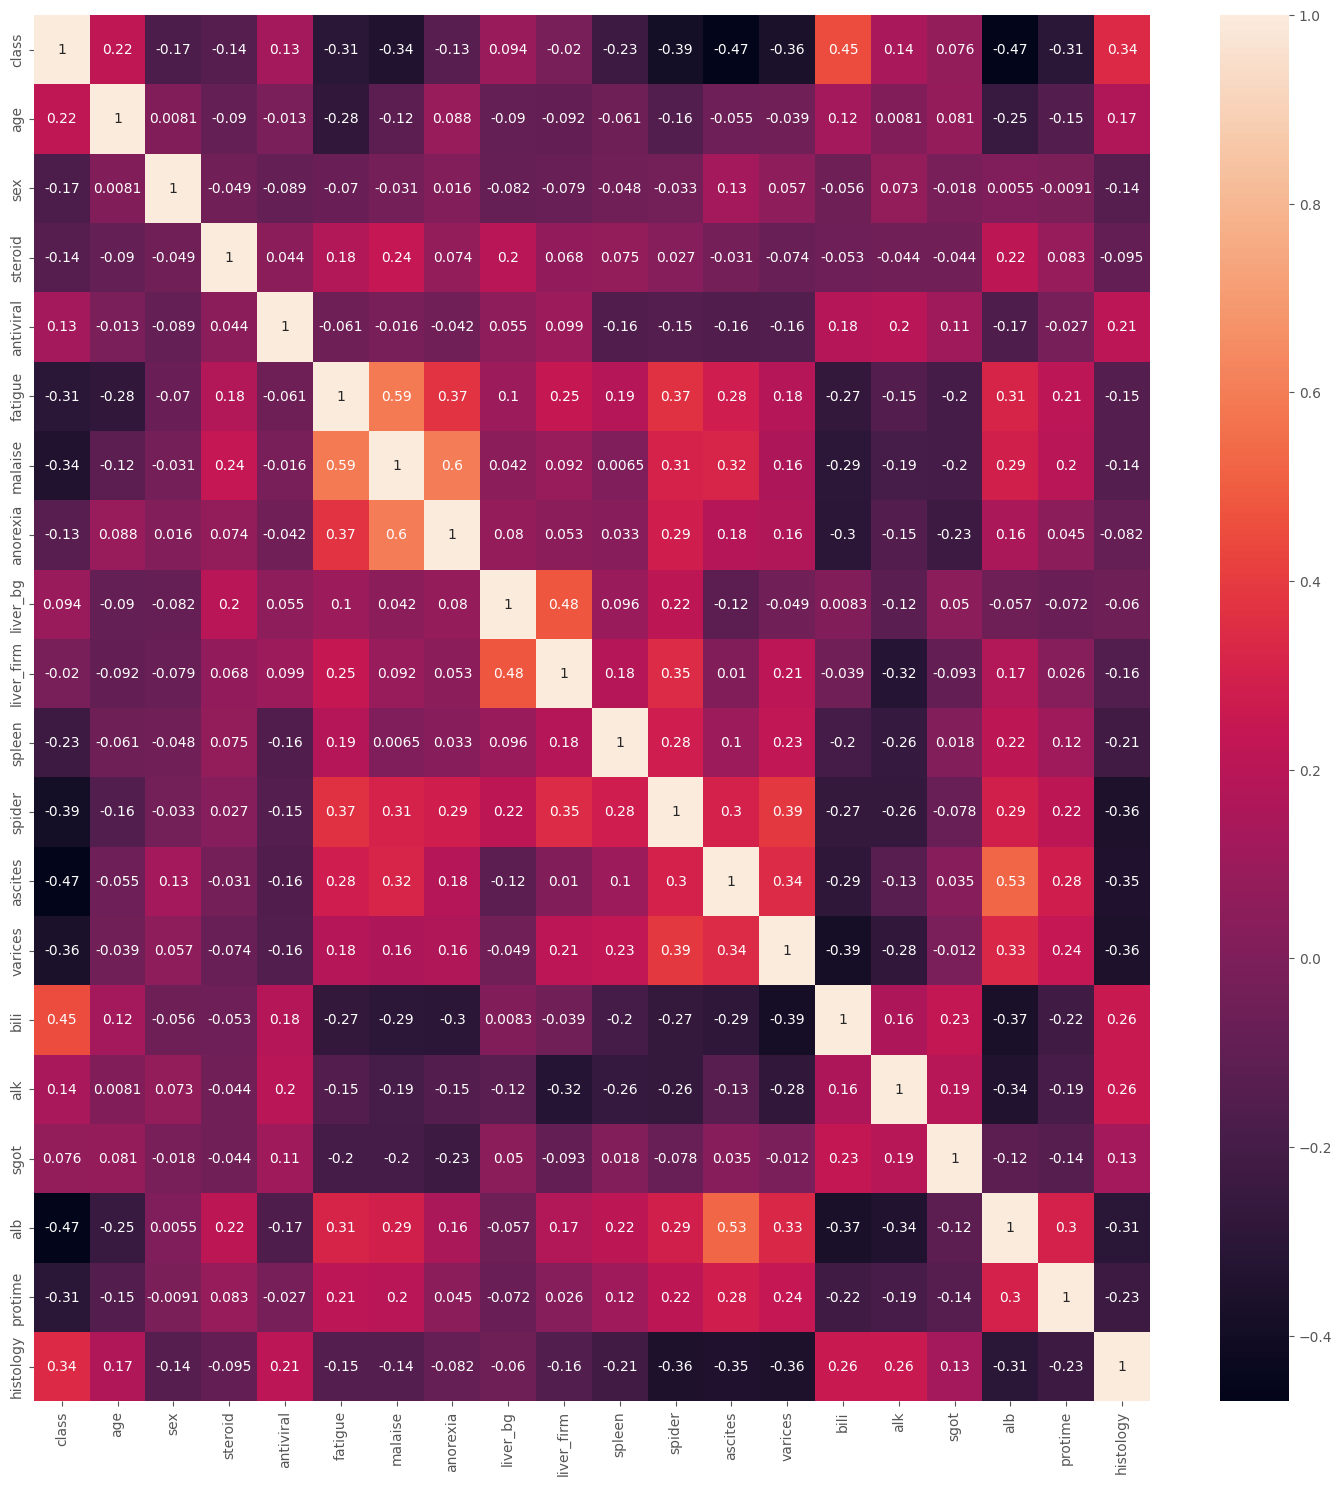

In [27]:
fig, ax = plt.subplots(figsize = (18,18))
sns.heatmap(df.corr(), ax = ax, annot = True)

Insights:

1. Bilirubin and class values correlate
2. Ascites and albumun values correlate 
3. Liver_bg and liver_firm values correlate
4. Anorexia and malaise have a high correlation
5. Malaise and fatigue have a high correlation

In [28]:
df.corr()['class'].sort_values(ascending=False)

class         1.000000
bili          0.450470
histology     0.337856
age           0.219647
alk           0.141005
antiviral     0.130196
liver_bg      0.093665
sgot          0.075579
liver_firm   -0.020057
anorexia     -0.133638
steroid      -0.137413
sex          -0.173051
spleen       -0.234261
fatigue      -0.306049
protime      -0.307238
malaise      -0.339530
varices      -0.362385
spider       -0.389137
alb          -0.465827
ascites      -0.469334
Name: class, dtype: float64

Insights:

1. Bilirubin and histology values have the highest correlation with hepatitis dx outcomes - expected, considering hepatitis primarily affects liver function and histological features are used for hepatitis dx
2. Bottom 7 features are highly negatively correlated with our outcome of interest; consideration for dropping these features to reduce noise 

# Plots

Checking the distribution of the cont. vars to determine whether to normalize and/or scale the data 

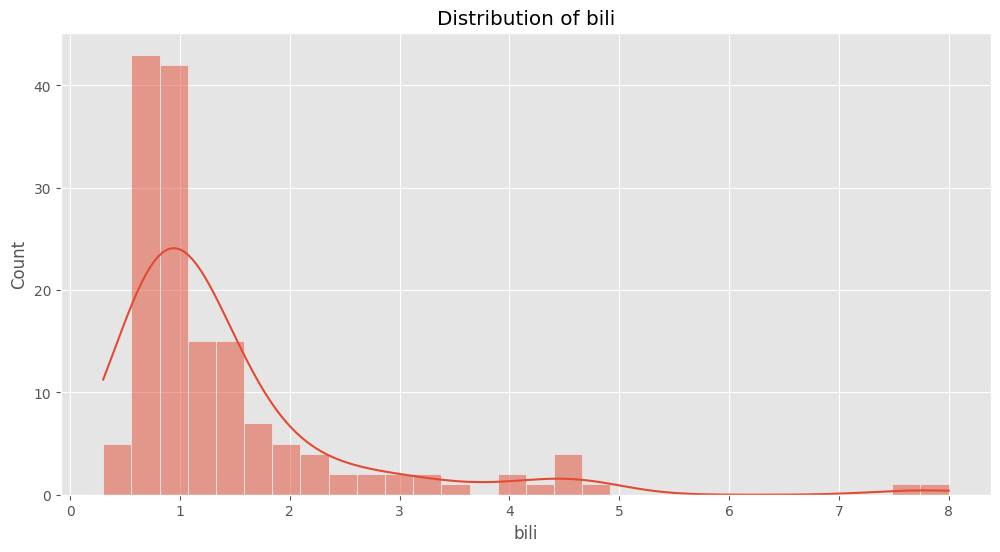

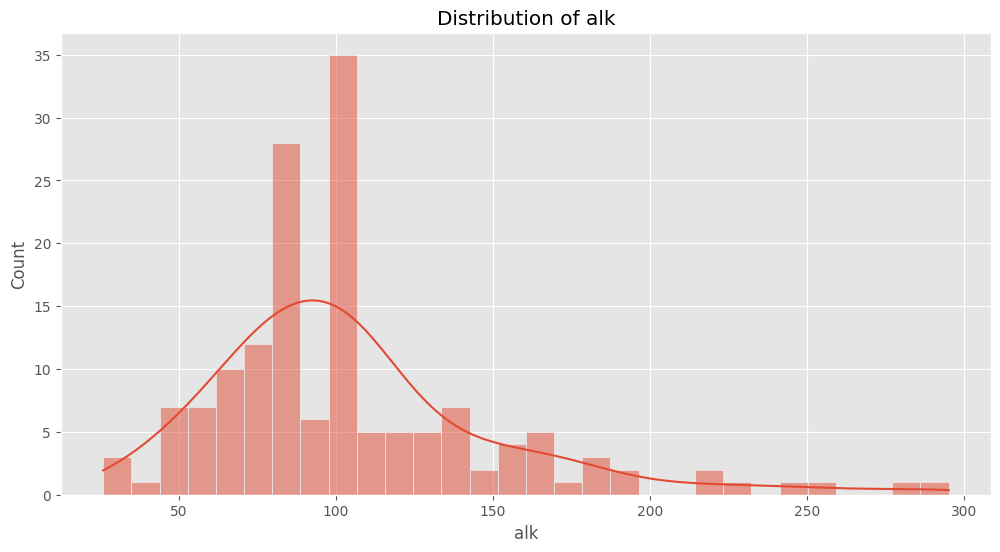

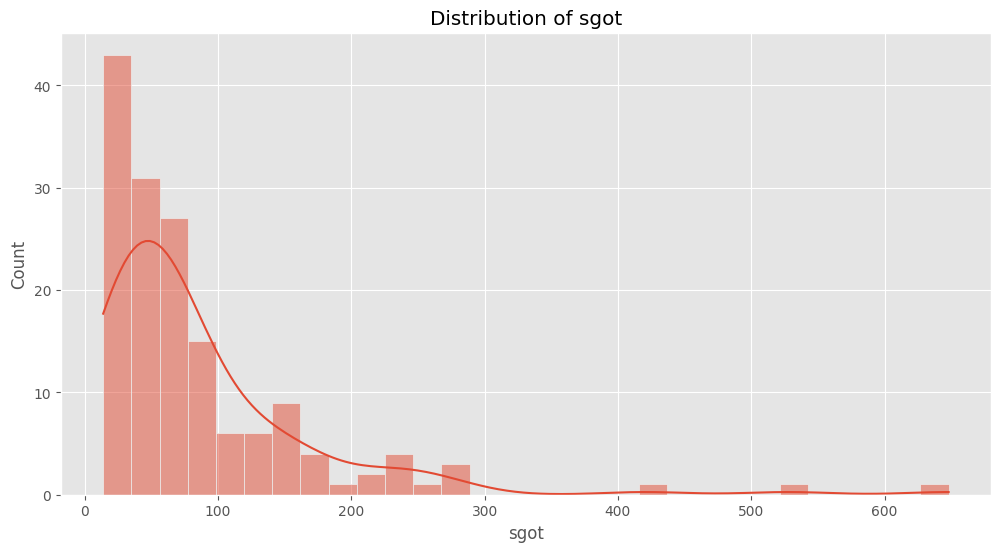

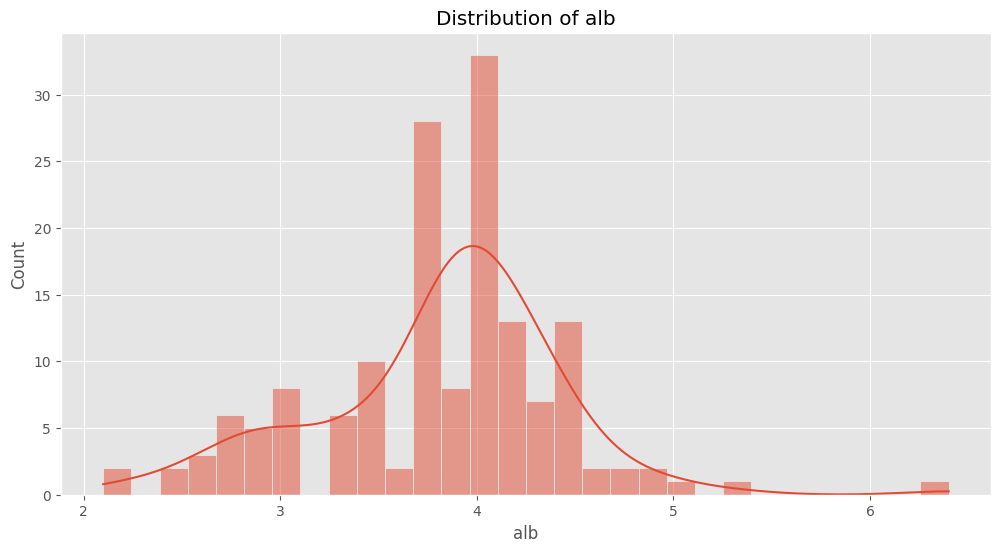

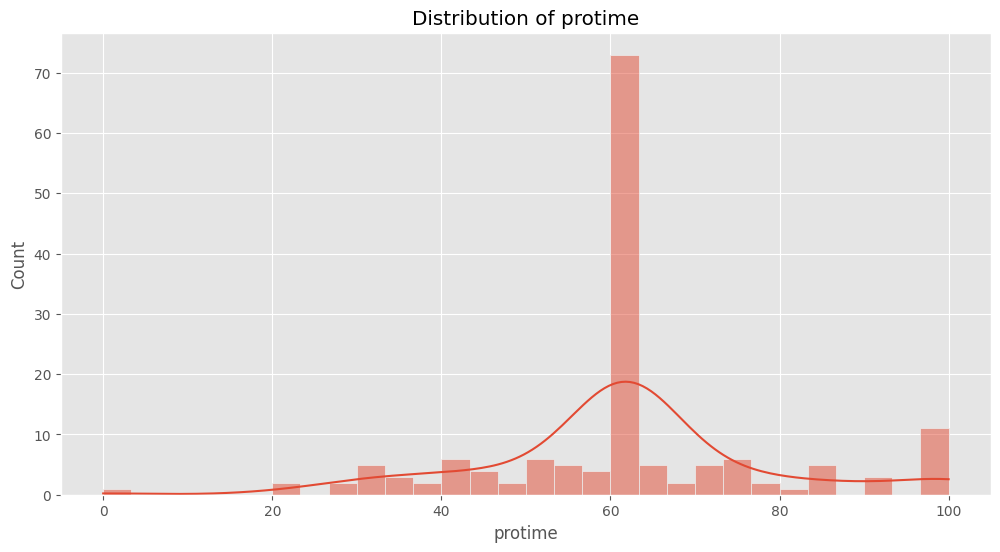

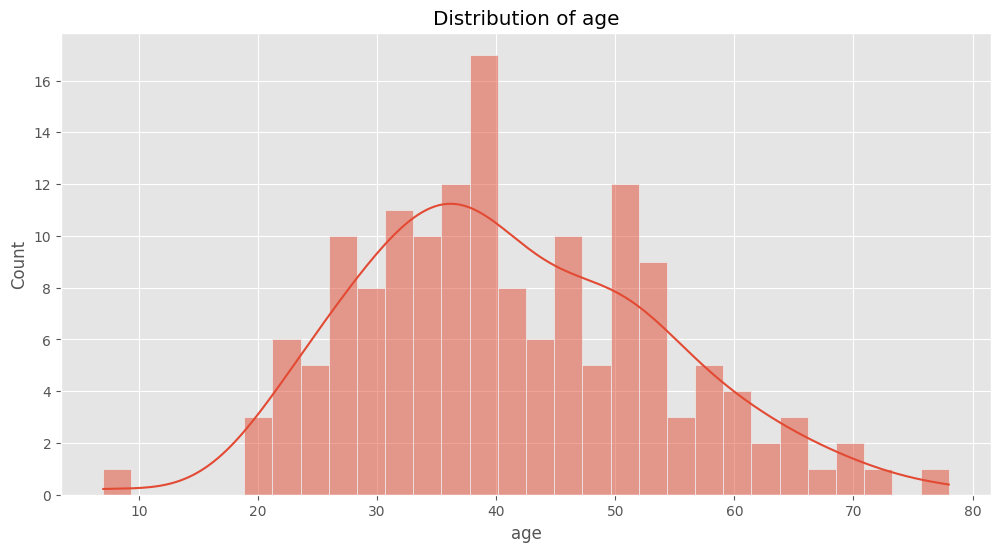

In [29]:
for feature in cont_feats:
    plt.figure(figsize=(12,6))
    sns.histplot(data=df[feature], bins=30, kde=True)
    plt.title('Distribution of {}'.format(feature))
    plt.show()

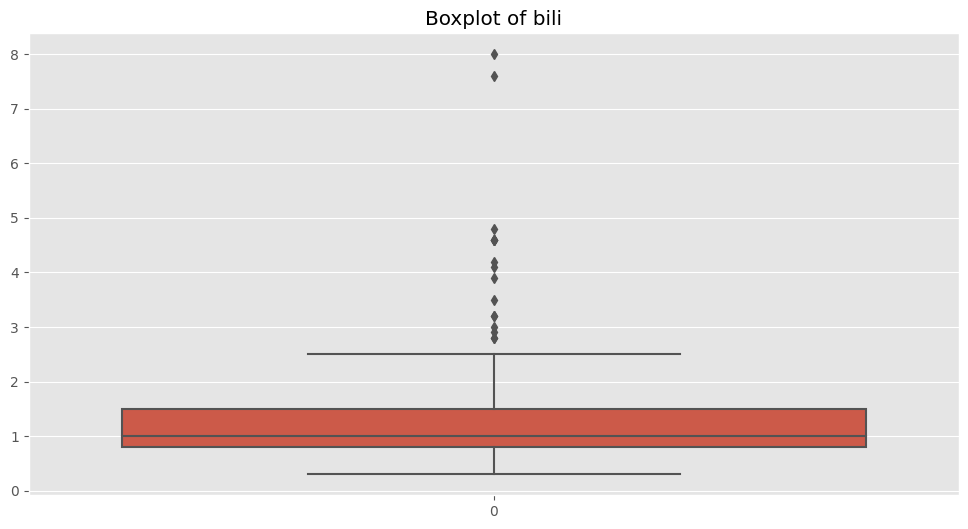

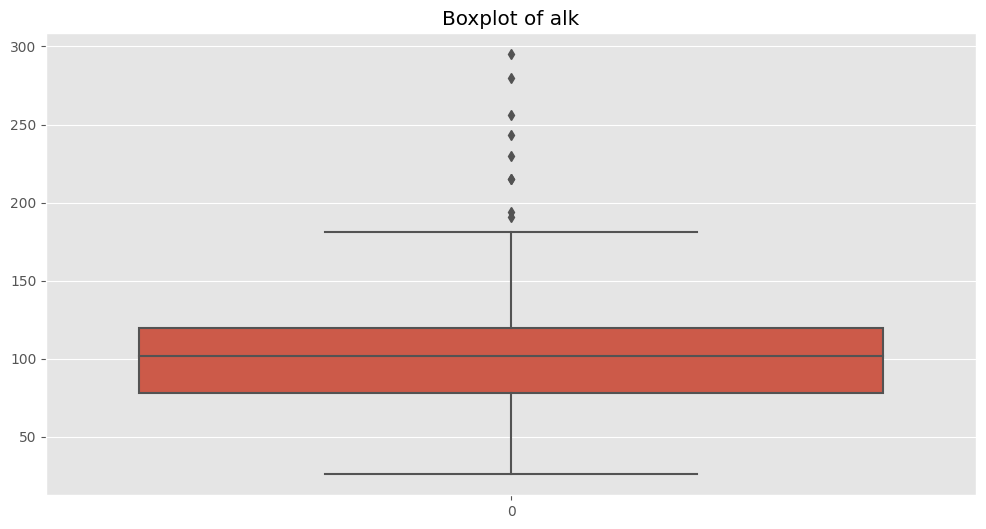

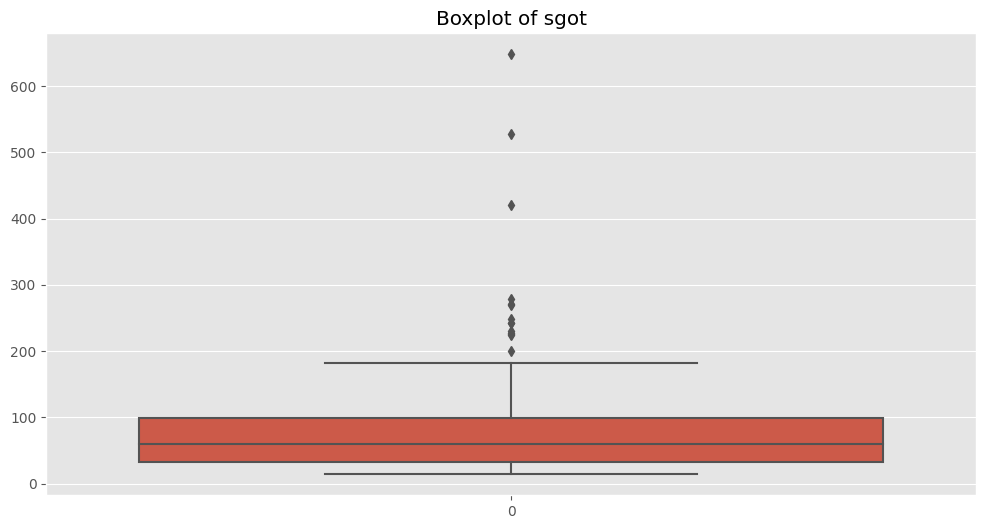

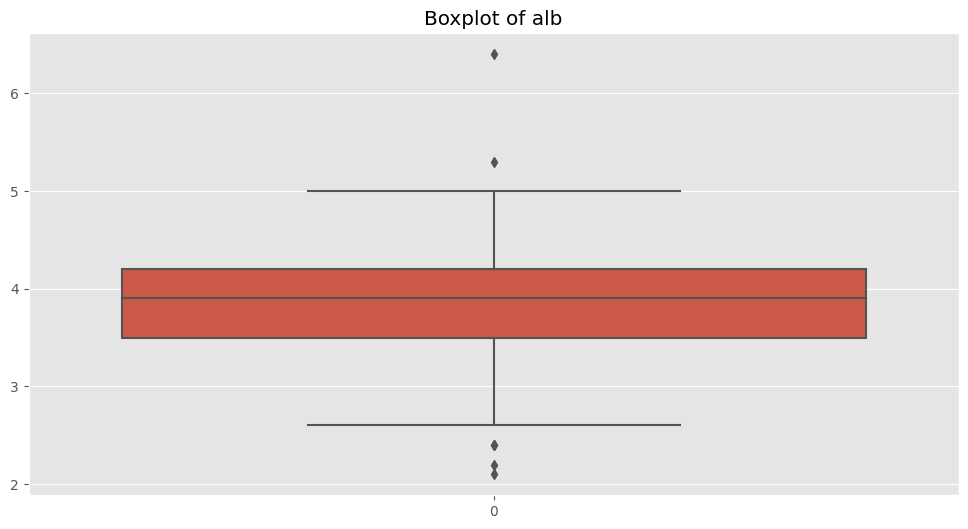

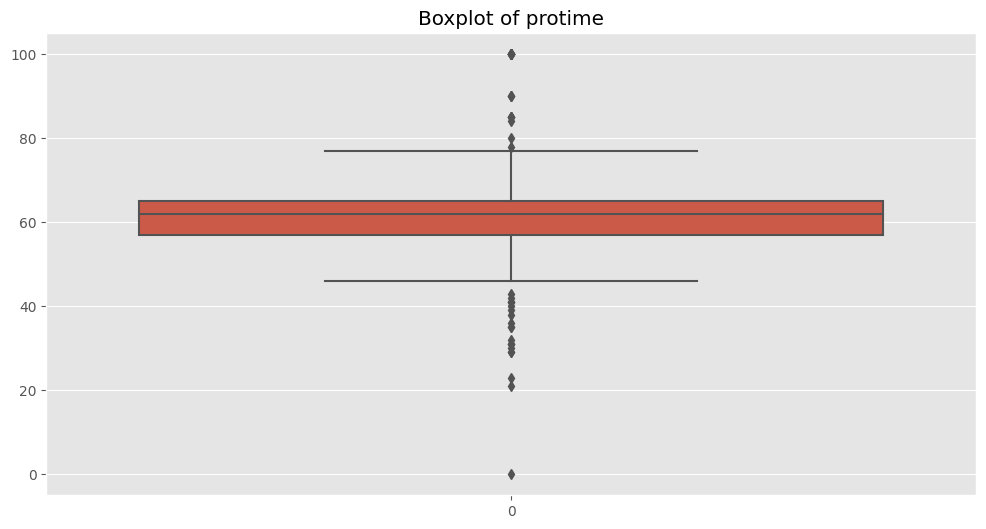

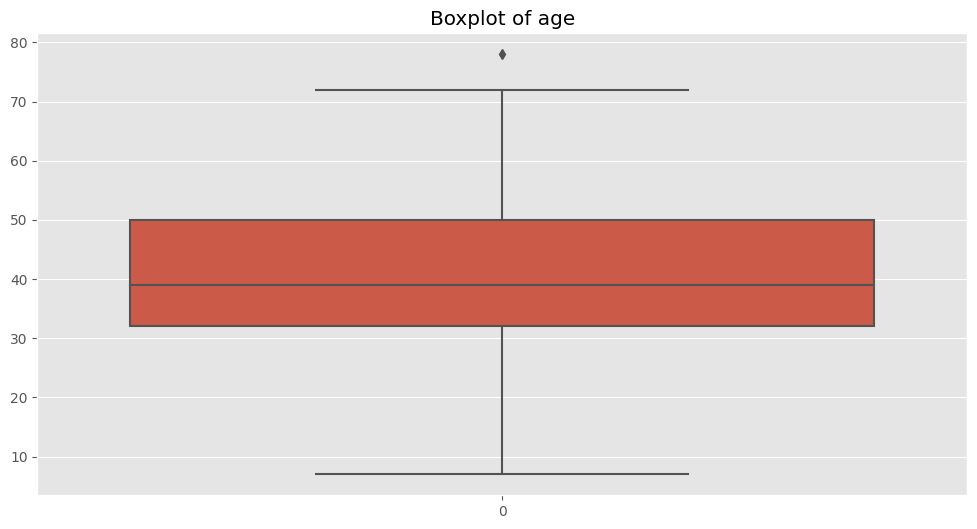

In [30]:
for feature in cont_feats:
    plt.figure(figsize=(12,6))
    sns.boxplot(data=df[feature])
    plt.title('Boxplot of {}'.format(feature))
    plt.show()

### Bilirubin and Class

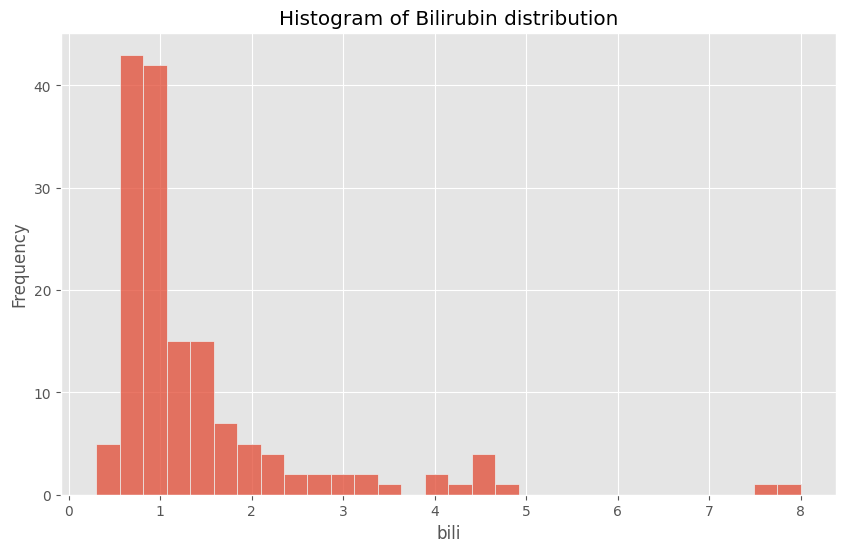

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(df['bili'], bins=30, kde=False)
plt.title('Histogram of Bilirubin distribution')
plt.xlabel('bili')
plt.ylabel('Frequency')
plt.show()

Bilirubin is skewed right 

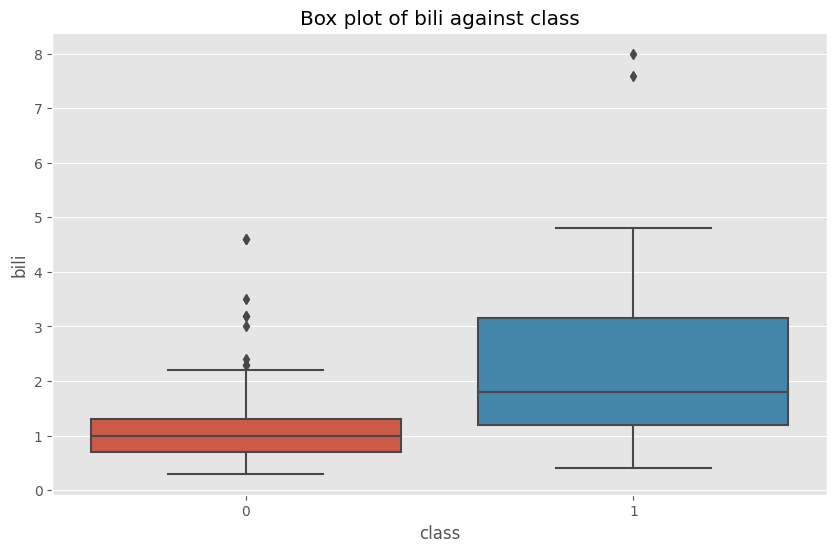

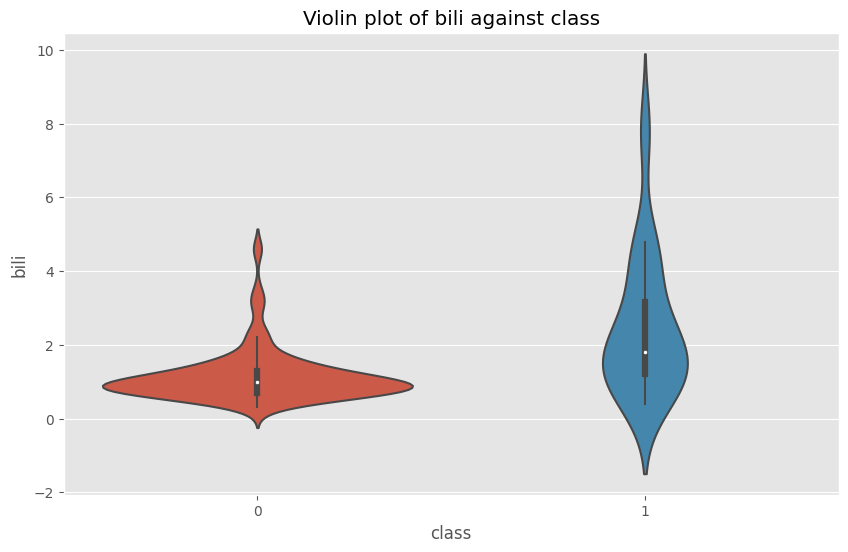

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='bili', data=df)
plt.title('Box plot of bili against class')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x='class', y='bili', data=df)
plt.title('Violin plot of bili against class')
plt.show()

Higher levels of bilirubin in those who died from their hepatitis dx

### Age and Class

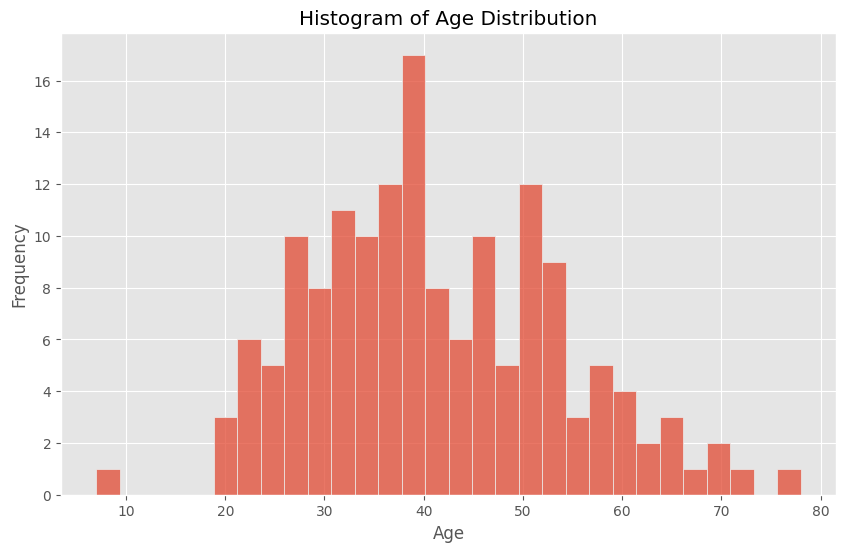

In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=False)
plt.title('Histogram of Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Age distribution appears to be gaussian

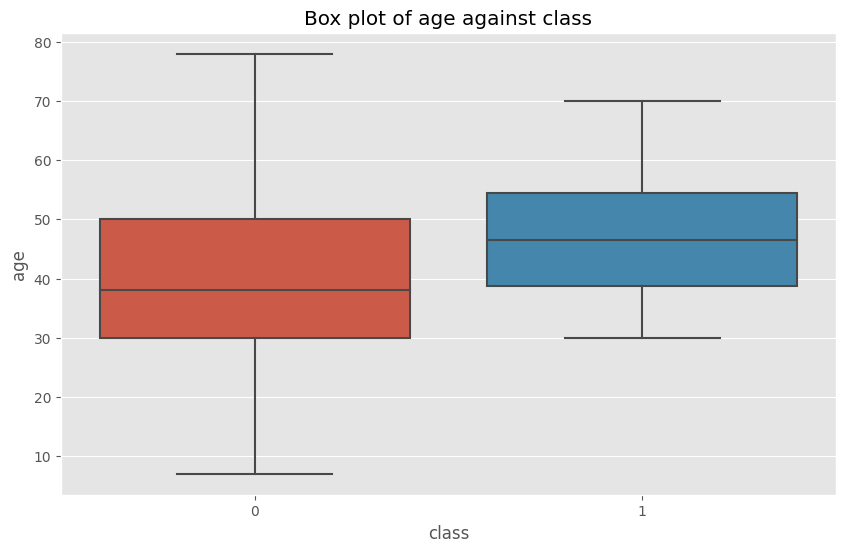

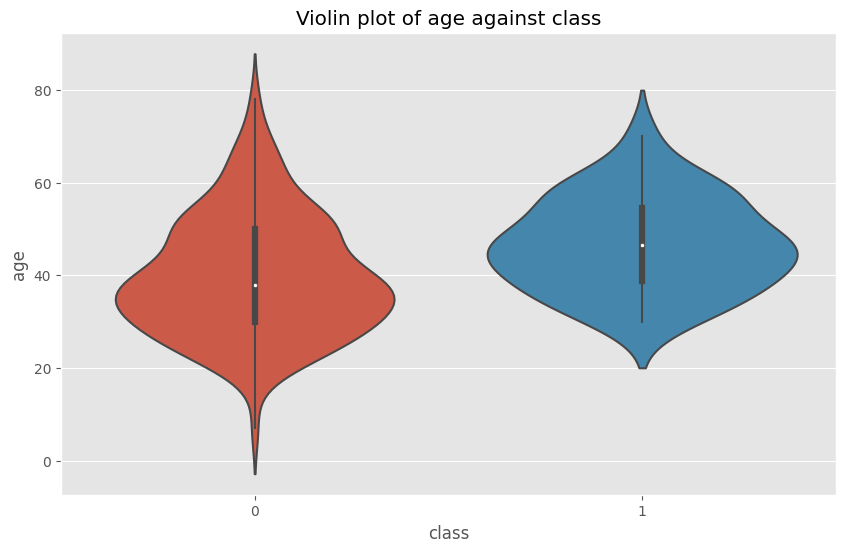

In [34]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='age', data=df)
plt.title('Box plot of age against class')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x='class', y='age', data=df)
plt.title('Violin plot of age against class')
plt.show()

### Alkaline and Class

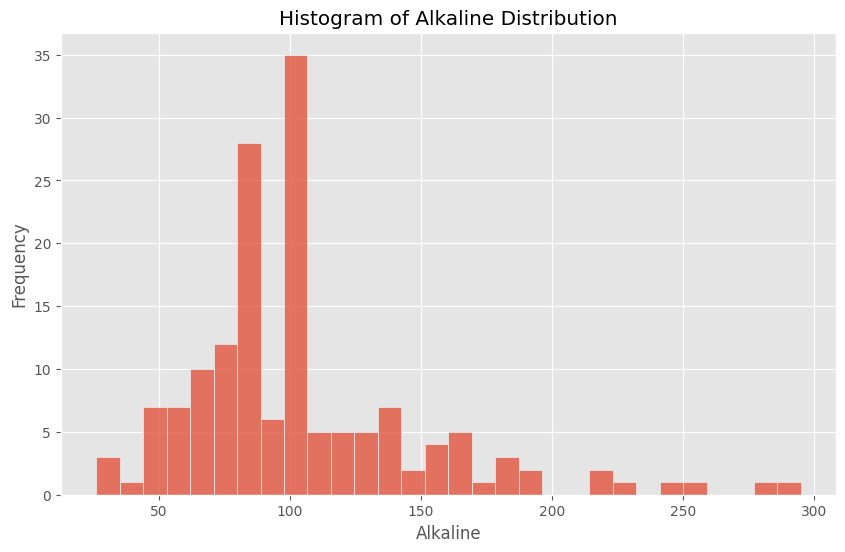

In [35]:
plt.figure(figsize=(10, 6))
sns.histplot(df['alk'], bins=30, kde=False)
plt.title('Histogram of Alkaline Distribution')
plt.xlabel('Alkaline')
plt.ylabel('Frequency')
plt.show()

Distribution is skewed right 

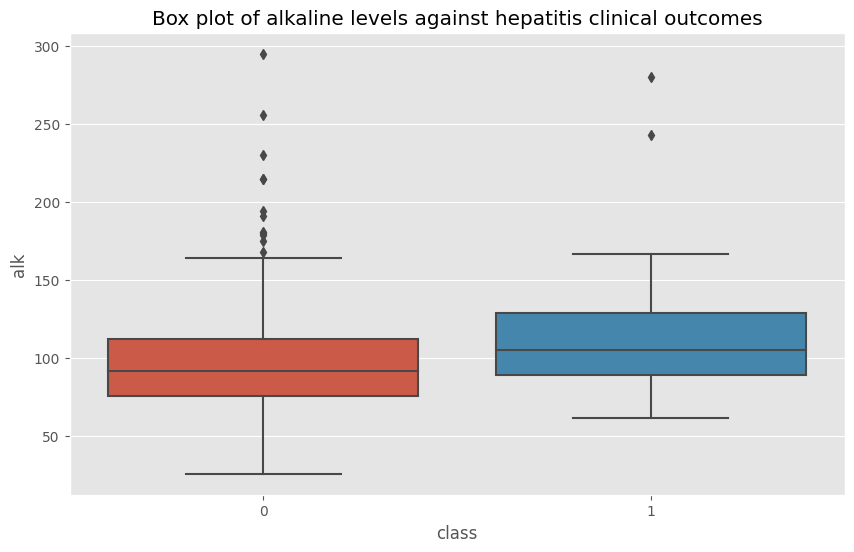

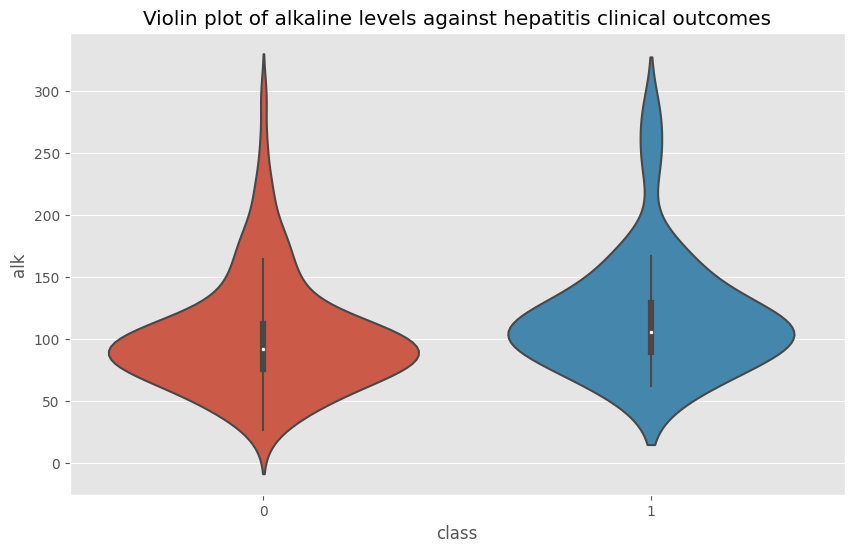

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='alk', data=df)
plt.title('Box plot of alkaline levels against hepatitis clinical outcomes')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x='class', y='alk', data=df)
plt.title('Violin plot of alkaline levels against hepatitis clinical outcomes')
plt.show()

large number of outliers identified in those who lived 

# Scatter Matrix 

#### Looking for any correlations between features that may suggest confounding

In [37]:
df.head(20)

,class,age,sex,steroid,antiviral,fatigue,malaise,anorexia,liver_bg,liver_firm,spleen,spider,ascites,varices,bili,alk,sgot,alb,protime,histology
0,0,30,1,0.0,1,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.000000,85.000000,18.00000,4.000000,61.852273,0
1,0,50,0,0.0,1,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.900000,135.000000,42.00000,3.500000,61.852273,0
2,0,78,0,1.0,1,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.700000,96.000000,32.00000,4.000000,61.852273,0
3,0,31,0,1.0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.700000,46.000000,52.00000,4.000000,80.000000,0
4,0,34,0,1.0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,105.325397,200.00000,4.000000,61.852273,0
5,0,34,0,1.0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.900000,95.000000,28.00000,4.000000,75.000000,0
6,1,51,0,0.0,1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.427517,105.325397,85.89404,3.817266,61.852273,0
7,0,23,0,1.0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,105.325397,85.89404,3.817266,61.852273,0
8,0,39,0,1.0,1,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.700000,105.325397,48.00000,4.400000,61.852273,0
9,0,30,0,1.0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,105.325397,120.00000,3.900000,61.852273,0


array([[<AxesSubplot: xlabel='alk', ylabel='alk'>,
        <AxesSubplot: xlabel='bili', ylabel='alk'>,
        <AxesSubplot: xlabel='age', ylabel='alk'>,
        <AxesSubplot: xlabel='sgot', ylabel='alk'>],
       [<AxesSubplot: xlabel='alk', ylabel='bili'>,
        <AxesSubplot: xlabel='bili', ylabel='bili'>,
        <AxesSubplot: xlabel='age', ylabel='bili'>,
        <AxesSubplot: xlabel='sgot', ylabel='bili'>],
       [<AxesSubplot: xlabel='alk', ylabel='age'>,
        <AxesSubplot: xlabel='bili', ylabel='age'>,
        <AxesSubplot: xlabel='age', ylabel='age'>,
        <AxesSubplot: xlabel='sgot', ylabel='age'>],
       [<AxesSubplot: xlabel='alk', ylabel='sgot'>,
        <AxesSubplot: xlabel='bili', ylabel='sgot'>,
        <AxesSubplot: xlabel='age', ylabel='sgot'>,
        <AxesSubplot: xlabel='sgot', ylabel='sgot'>]], dtype=object)

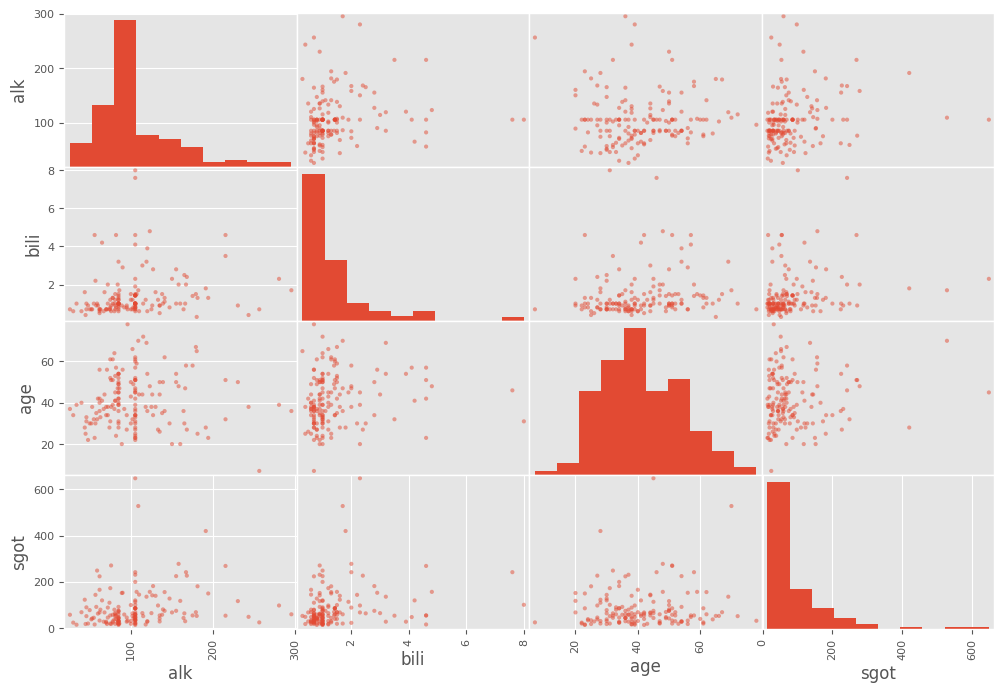

In [38]:
from pandas.plotting import scatter_matrix

attributes = ["alk", "bili", "age", "sgot"]

scatter_matrix(df[attributes], figsize=(12,8))

No notable correlations

# Data pre-processing begins

#### Since most of the data is binary, we only need to scale, normalize and handle outliers for the continuous features

address class imbalance with SMOTE

In [39]:
X = df.drop('class', axis=1)
y = df['class']

In [40]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split 
from collections import Counter

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [41]:
y_train.unique()

array([0, 1], dtype=int64)

In [42]:
y_res.unique()

array([0, 1], dtype=int64)

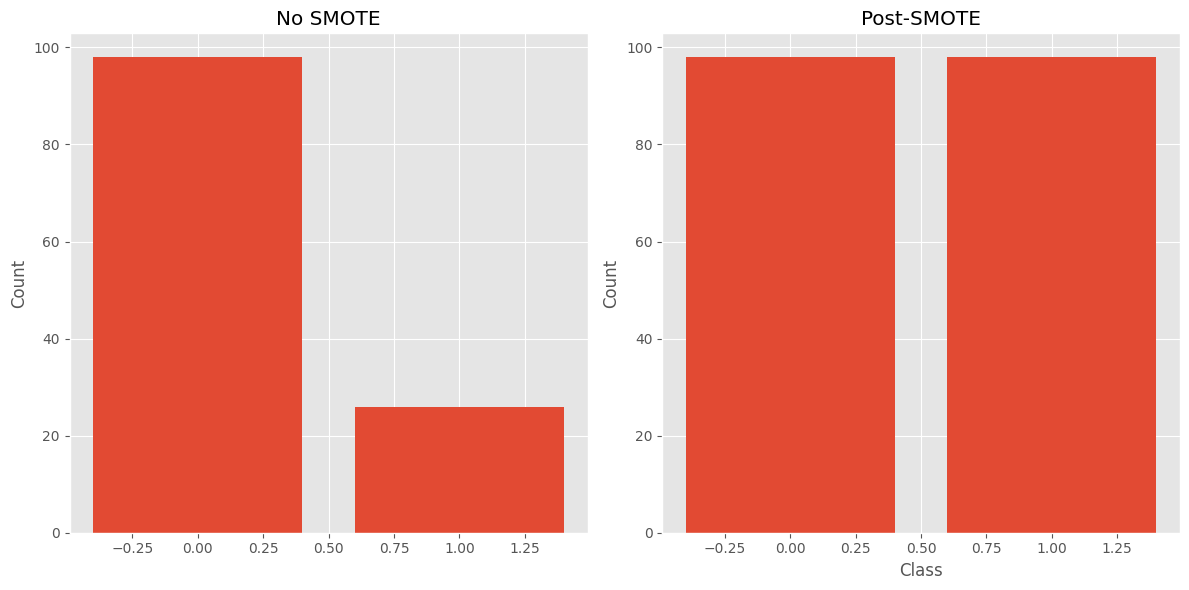

In [43]:
(unique_train, counts_train) = np.unique(y_train, return_counts=True)
(unique_res, counts_res) = np.unique(y_res, return_counts=True)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(unique_train, counts_train)
plt.title('No SMOTE')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.bar(unique_res, counts_res)
plt.title('Post-SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [44]:
#check class distribution
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 98, 1: 98})


transformations

log transformations will be applied to bili, alk, sgot and alb (skewed left)
sqrt transformation applied to protime (skewed right)

In [45]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Initialize the scalers
scaler_standard = StandardScaler()
scaler_normalize = MinMaxScaler()

# For the training set
X_train['bili'] = np.log1p(X_train['bili'])
X_train['alk'] = np.log1p(X_train['alk'])
X_train['sgot'] = np.log1p(X_train['sgot'])
X_train['alb'] = np.log1p(X_train['alb'])
X_train['protime'] = np.sqrt(X_train['protime'])

# For the test set
X_test['bili'] = np.log1p(X_test['bili'])
X_test['alk'] = np.log1p(X_test['alk'])
X_test['sgot'] = np.log1p(X_test['sgot'])
X_test['alb'] = np.log1p(X_test['alb'])
X_test['protime'] = np.sqrt(X_test['protime'])

# For the resampled set
X_res['bili'] = np.log1p(X_res['bili'])
X_res['alk'] = np.log1p(X_res['alk'])
X_res['sgot'] = np.log1p(X_res['sgot'])
X_res['alb'] = np.log1p(X_res['alb'])
X_res['protime'] = np.sqrt(X_res['protime'])

scaling and normalization of cont. features

In [46]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Scaler init.
scaler_standard = StandardScaler()
scaler_normalize = MinMaxScaler()

# df copy
X_res_copy = X_res.copy()
X_test_copy = X_test.copy()
X_train_copy = X_train.copy()

# skewed feats list
skewed_feats = [feat for feat in cont_feats if feat != 'age']

# Scaler fit
X_train_copy[skewed_feats] = scaler_normalize.fit_transform(X_train_copy[skewed_feats])
X_res_copy[skewed_feats] = scaler_normalize.transform(X_res_copy[skewed_feats])
X_test_copy[skewed_feats] = scaler_normalize.transform(X_test_copy[skewed_feats])

#standard scaler on the 'age' feature in the training set and transform all the sets
X_train_copy['age'] = scaler_standard.fit_transform(X_train_copy[['age']])
X_res_copy['age'] = scaler_standard.transform(X_res_copy[['age']])
X_test_copy['age'] = scaler_standard.transform(X_test_copy[['age']])

# Overwrite vars
X_res = X_res_copy.copy()
X_test = X_test_copy.copy()
X_train = X_train_copy.copy()

In [47]:
X_train

,age,sex,steroid,antiviral,fatigue,malaise,anorexia,liver_bg,liver_firm,spleen,spider,ascites,varices,bili,alk,sgot,alb,protime,histology
13,-0.884801,0,1.0,1,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.465556,0.319315,0.602191,0.739647,0.883176,0
145,-0.804600,0,0.0,1,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.271902,0.432193,0.650586,0.594494,0.734847,1
70,-1.366009,0,1.0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.168189,0.468989,0.260348,0.616387,0.786462,0
113,0.318218,0,0.0,1,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.271902,0.463926,0.393272,0.292953,0.786462,0
116,-1.366009,0,0.0,1,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.222643,0.572418,0.224904,0.572177,0.786462,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,-0.403594,0,0.0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.377747,1.000000,0.372360,0.203350,0.786462,1
28,1.601438,0,0.0,1,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.294877,0.448361,0.146002,0.502500,1.000000,0
43,1.200432,0,0.0,1,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.138648,0.409614,0.062746,0.637870,1.000000,0
125,-0.563996,1,1.0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.138648,0.403773,0.135592,0.572177,1.000000,1


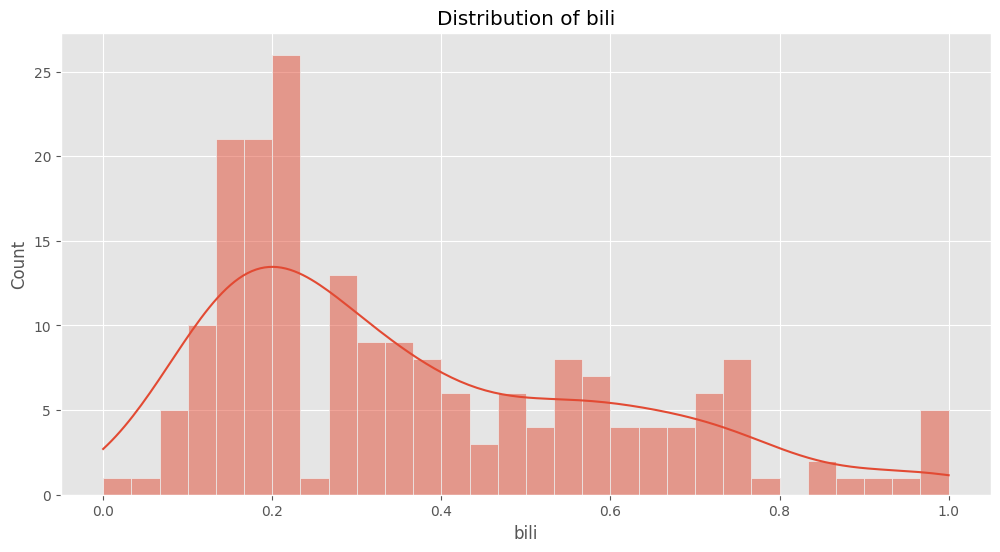

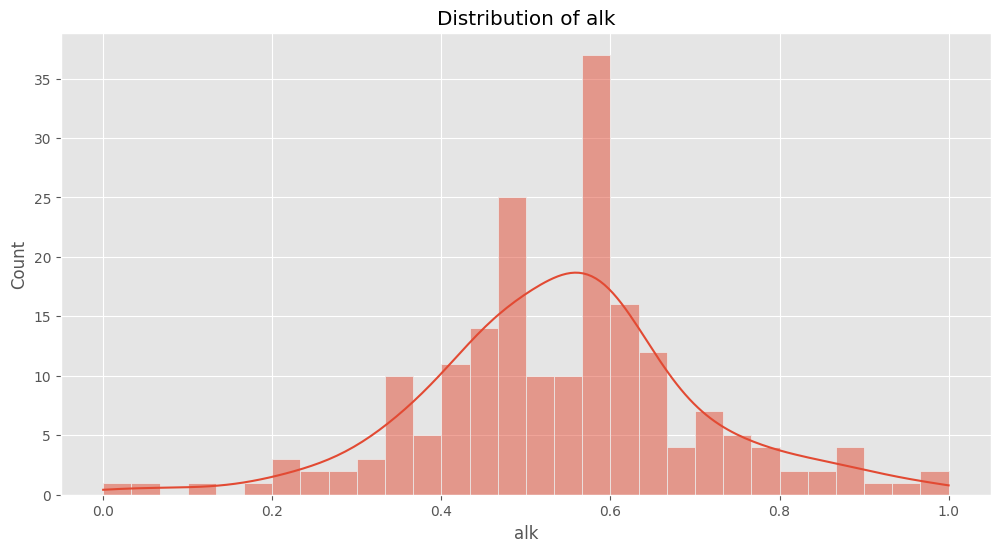

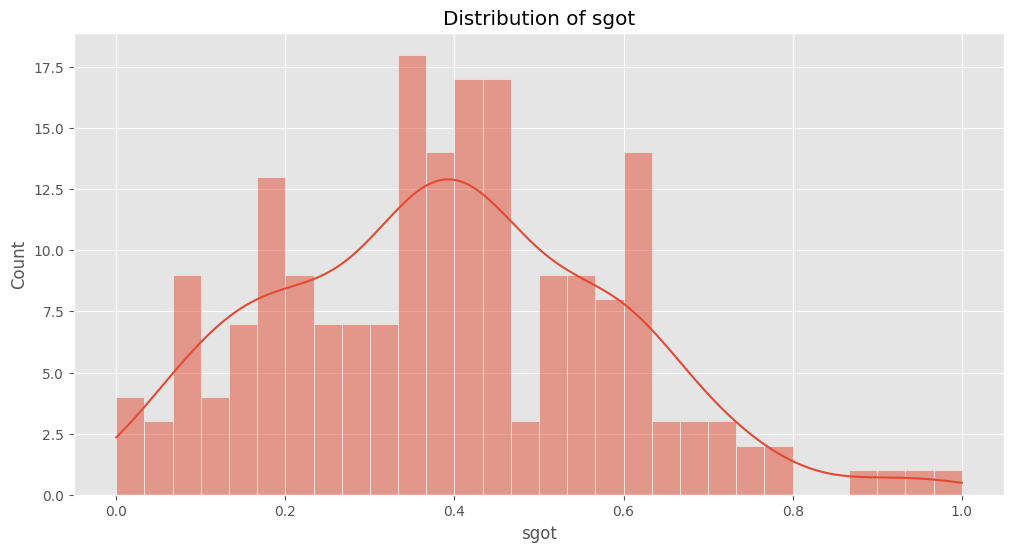

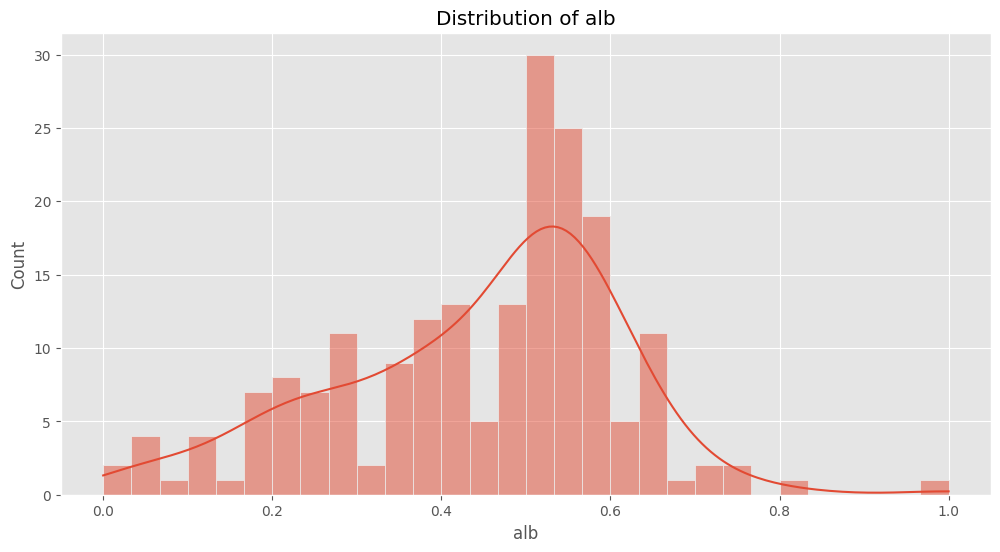

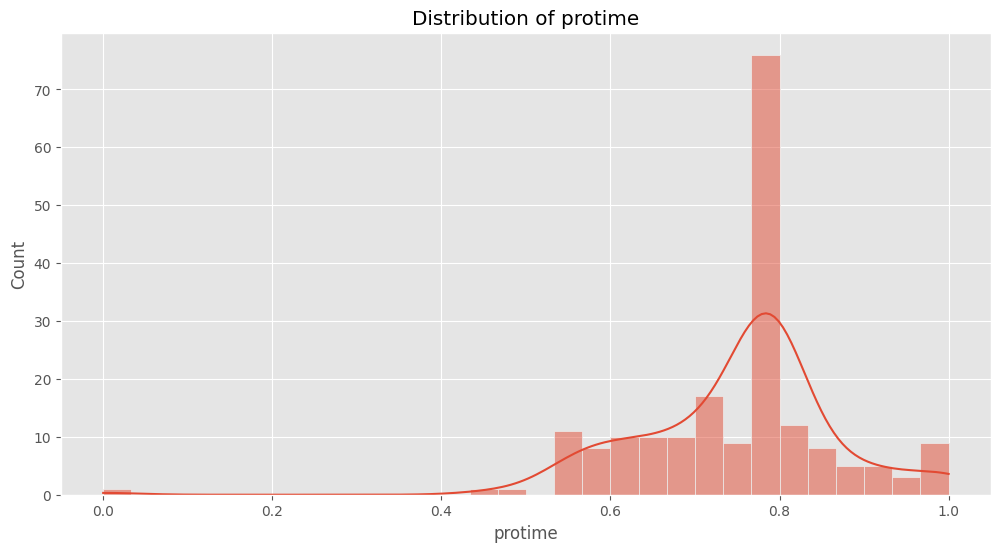

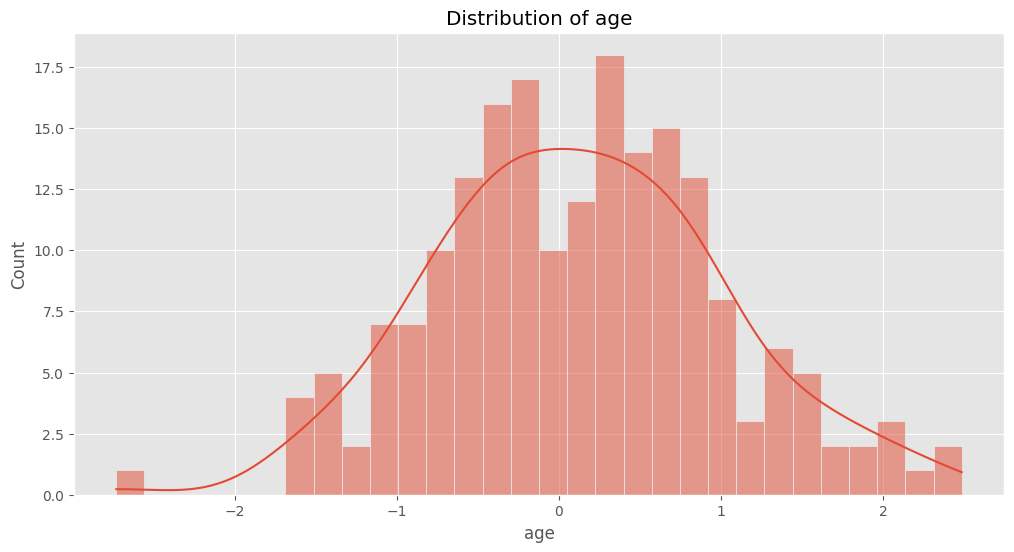

In [98]:
for feature in cont_feats:
    plt.figure(figsize=(12,6))
    sns.histplot(data=X_res[feature], bins=30, kde=True)
    plt.title('Distribution of {}'.format(feature))
    plt.show()

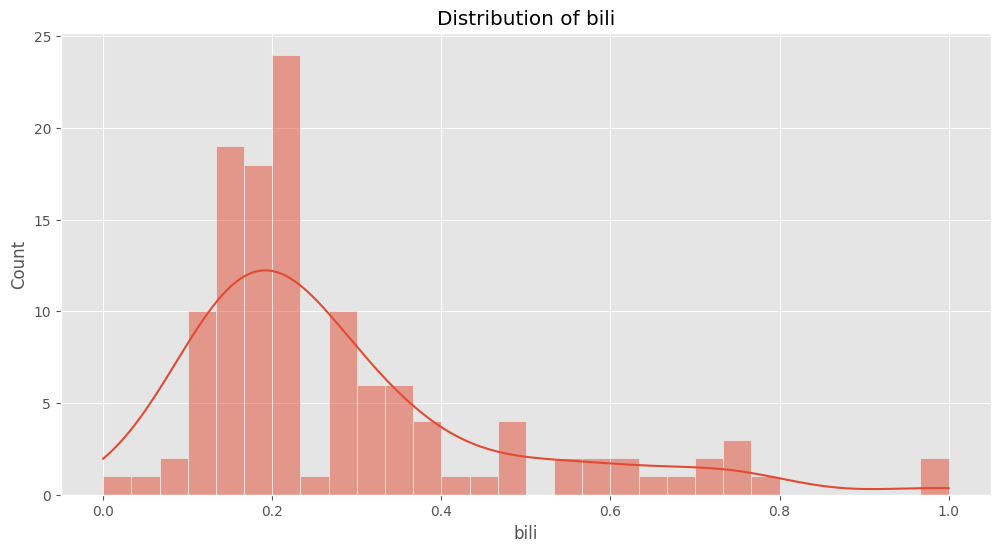

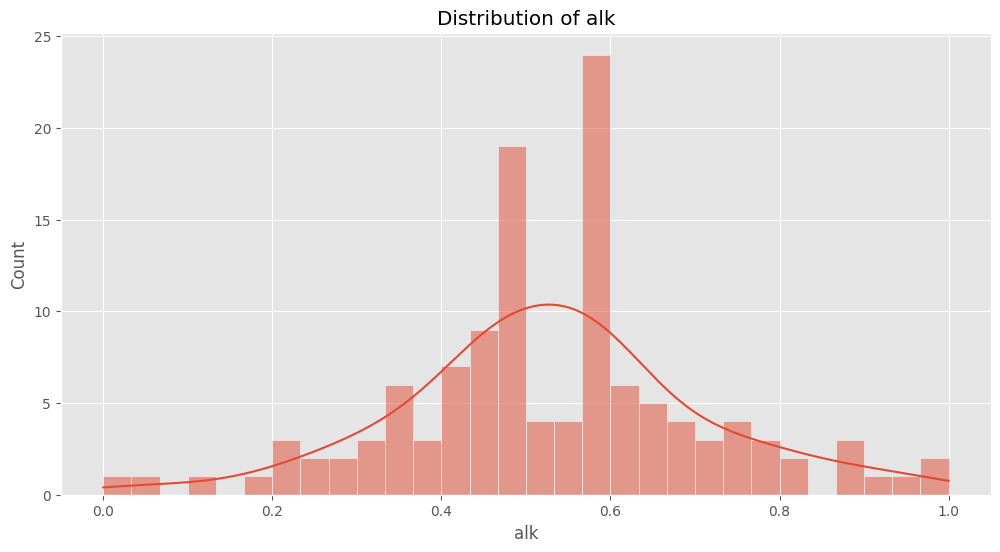

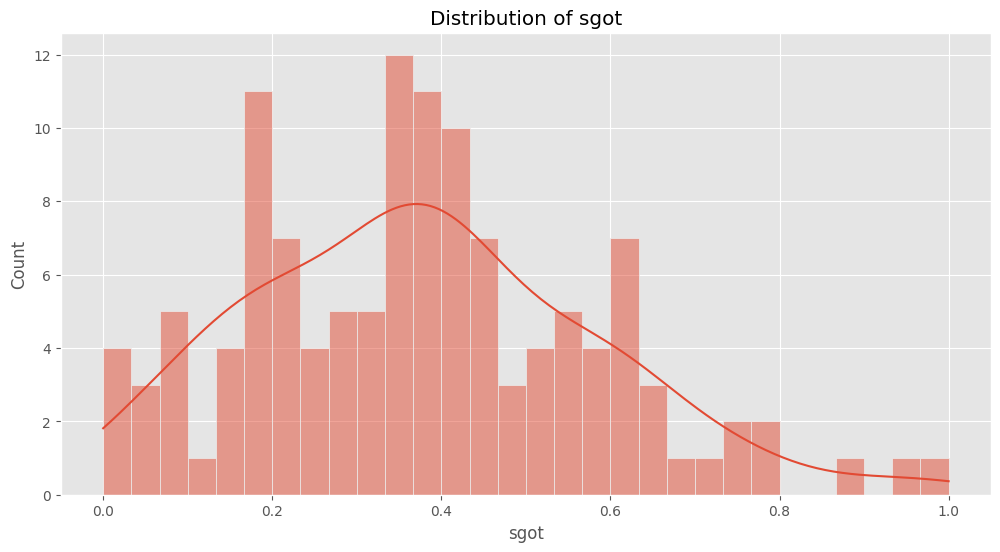

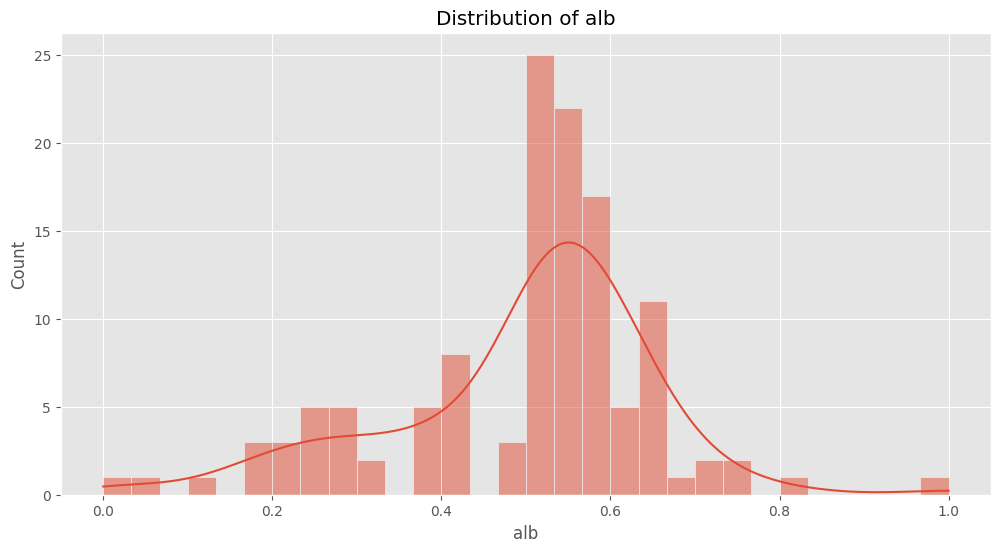

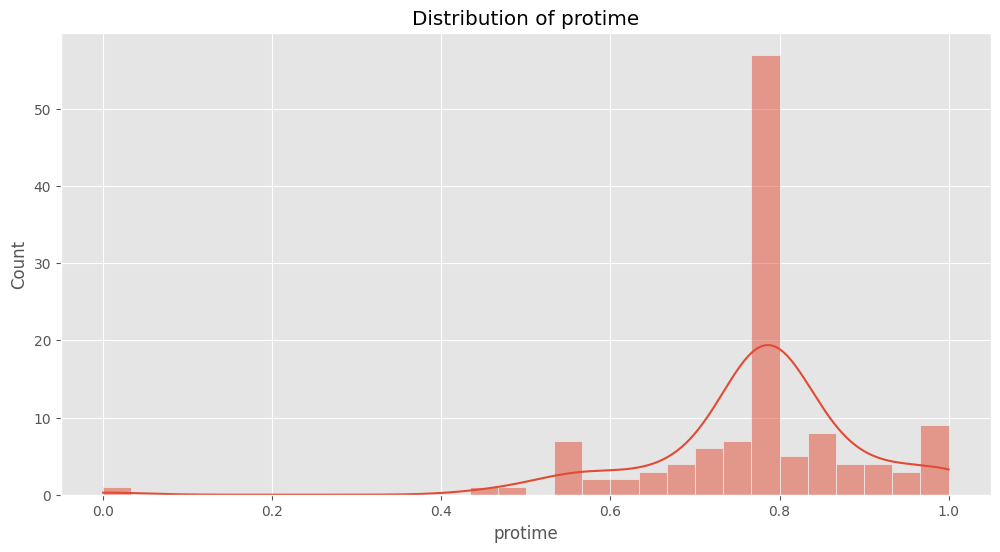

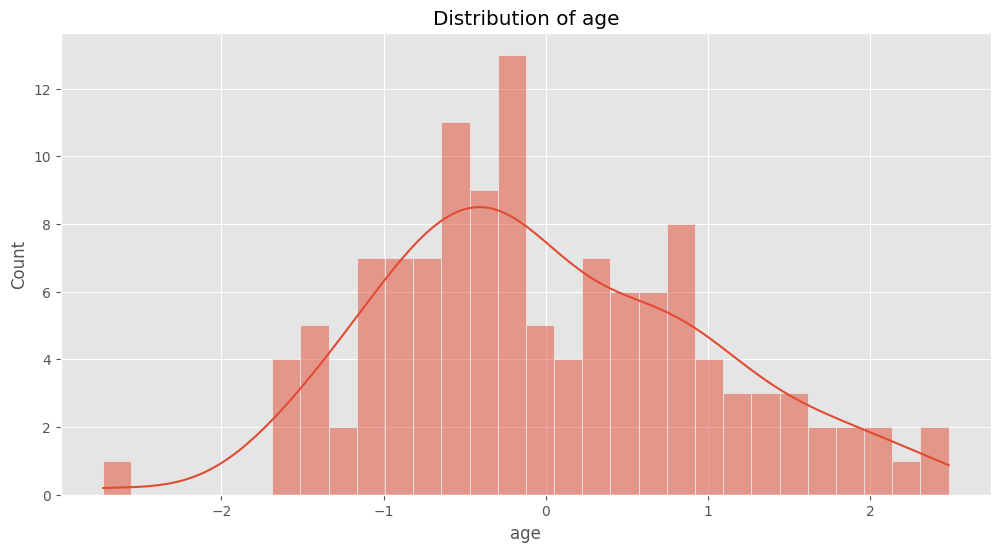

In [99]:
for feature in cont_feats:
    plt.figure(figsize=(12,6))
    sns.histplot(data=X_train[feature], bins=30, kde=True)
    plt.title('Distribution of {}'.format(feature))
    plt.show()

In [49]:
df[binary_feats].apply(pd.Series.value_counts)

,steroid,fatigue,malaise,anorexia,liver_bg,liver_firm,spleen,spider,ascites,varices
0.0,76,101,61,32,25,60,30,51,20,18
1.0,79,54,94,123,130,95,125,104,135,137


Observe new class balance post SMOTE

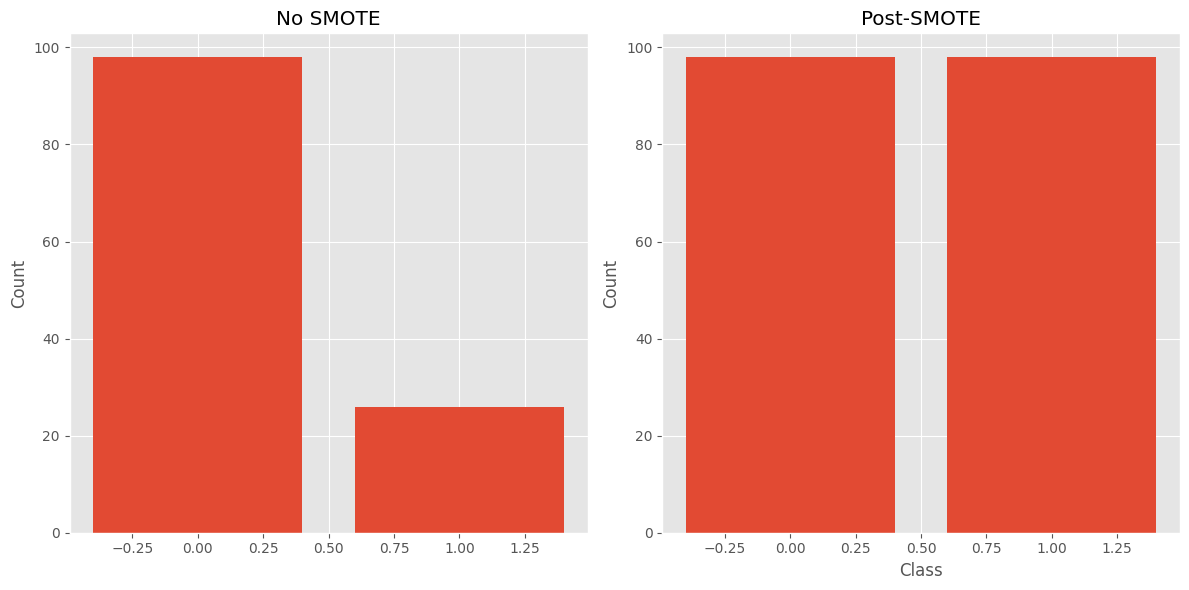

In [50]:
(unique_train, counts_train) = np.unique(y_train, return_counts=True)
(unique_res, counts_res) = np.unique(y_res, return_counts=True)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(unique_train, counts_train)
plt.title('No SMOTE')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.bar(unique_res, counts_res)
plt.title('Post-SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Model Selection


##### 1. The first block of code for each respective model performs a grid search to find the optimal hyperparameters
##### 2. The second block of code for reach respective model fits and cross-validates for both the balanced (SMOTE) and unbalanced (no SMOTE) datasets. The results of are stored into a dataframe called 'scoreDF' for evaluation purposes later on
##### 3.The third block of code will print out the feature importances used for decision making. This block will be missing for KNN, SVM, and Logistic regression because you technically cannot measure feature importance for these models

In [51]:
# scoreDF to store algorithm performance

from sklearn.model_selection import cross_validate 

scoreDF = pd.DataFrame(columns = ['accuracy', 'f1', 'recall', 'precision', 'roc_auc', 'type', 'balance'])
testDF = pd.DataFrame(columns=['accuracy', 'F1 Score', 'Recall', 'Precision', 'ROC AUC', 'Model', 'Resampled'])


# Decision Tree Classifier

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a base model
dtc = DecisionTreeClassifier(random_state=42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = dtc, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_


Fitting 5 folds for each of 54 candidates, totalling 270 fits


In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate

# Create a Decision Tree Classifier model with the best parameters
dt = DecisionTreeClassifier(max_depth=best_params['max_depth'], min_samples_split=best_params['min_samples_split'],
                            min_samples_leaf=best_params['min_samples_leaf'], random_state=42)

dt.fit(X_train, y_train)

dtpred = dt.predict(X_test)

score = cross_validate(dt, X_train, y_train, cv=10, scoring=['accuracy', 'f1', 'recall', 'precision', "roc_auc"])
print("Test accuracy:{}".format(score["test_accuracy"].mean()))
data = [score["test_accuracy"].mean(), score["test_f1"].mean(), score["test_recall"].mean(), score['test_precision'].mean(),
        score["test_roc_auc"].mean(), "DecisionTree", "No"]
scoreDF.loc[len(scoreDF)] = data


dt.fit(X_res, y_res)

dtpred = dt.predict(X_test)


score = cross_validate(dt, X_res, y_res, cv=10, scoring=['accuracy', 'f1', 'recall', 'precision', "roc_auc"])
print("Test accuracy:{}".format(score["test_accuracy"].mean()))
data = [score["test_accuracy"].mean(), score["test_f1"].mean(), score["test_recall"].mean(), score['test_precision'].mean(),
        score["test_roc_auc"].mean(), "DecisionTree", "Yes"]
scoreDF.loc[len(scoreDF)] = data

Test accuracy:0.8096153846153846
Test accuracy:0.8878947368421052


In [54]:
dtpred

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0], dtype=int64)

In [55]:
scoreDF

,accuracy,f1,recall,precision,roc_auc,type,balance
0,0.809615,0.440000,0.433333,0.516667,0.696667,DecisionTree,No
1,0.887895,0.866402,0.830000,0.947778,0.899333,DecisionTree,Yes


       Feature  Importance
11     ascites    0.291494
13        bili    0.240267
17     protime    0.137171
16         alb    0.123697
14         alk    0.079519
9       spleen    0.061414
10      spider    0.027736
8   liver_firm    0.016699
15        sgot    0.012988
0          age    0.009014
1          sex    0.000000
7     liver_bg    0.000000
12     varices    0.000000
6     anorexia    0.000000
5      malaise    0.000000
4      fatigue    0.000000
3    antiviral    0.000000
2      steroid    0.000000
18   histology    0.000000


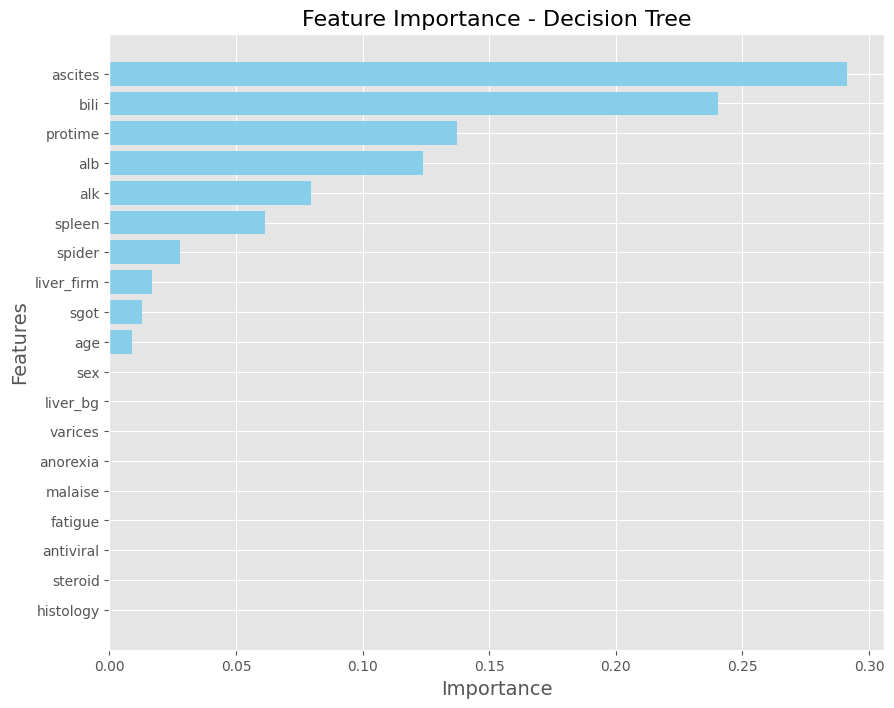

In [56]:
# Assume that 'features' is a list of feature names in the order they were given to the model
features = X_train.columns.tolist()

# Fit the model
dt.fit(X_train, y_train)

# Extract feature importances
importances = dt.feature_importances_

# Create a DataFrame to display the features and their importances
importances_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

# Sort the DataFrame by importance in descending order
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Display the DataFrame
print(importances_df)

#plot
plt.figure(figsize=(10, 8))
plt.barh(importances_df['Feature'], importances_df['Importance'], color='skyblue')
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.title('Feature Importance - Decision Tree', fontsize=16)
plt.gca().invert_yaxis()
plt.show()

# Random Forest Classifier

In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rfc = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 2)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


In [58]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'], min_samples_split=best_params['min_samples_split'],
                            min_samples_leaf=best_params['min_samples_leaf'], random_state=42)

rf.fit(X_train, y_train)

rfpred = rf.predict(X_test)

score = cross_validate(rf, X_train, y_train, cv=10, scoring=['accuracy', 'f1', 'recall', 'precision', "roc_auc"])
print("Test accuracy:{}".format(score["test_accuracy"].mean()))
data = [score["test_accuracy"].mean(), score["test_f1"].mean(), score["test_recall"].mean(), score['test_precision'].mean(),
        score["test_roc_auc"].mean(), "RandomForest", "No"]
scoreDF.loc[len(scoreDF)] = data

rf.fit(X_res, y_res)

rfpred = rf.predict(X_test)

score = cross_validate(rf, X_res, y_res, cv=10, scoring=['accuracy', 'f1', 'recall', 'precision', "roc_auc"])
print("Test accuracy:{}".format(score["test_accuracy"].mean()))
data = [score["test_accuracy"].mean(), score["test_f1"].mean(), score["test_recall"].mean(), score['test_precision'].mean(),
        score["test_roc_auc"].mean(), "RandomForest", "Yes"]
scoreDF.loc[len(scoreDF)] = data

Test accuracy:0.823076923076923
Test accuracy:0.9034210526315789


       Feature  Importance
13        bili    0.184038
16         alb    0.163494
17     protime    0.111188
0          age    0.082725
11     ascites    0.073696
14         alk    0.064608
10      spider    0.046518
15        sgot    0.044291
18   histology    0.039082
5      malaise    0.036911
12     varices    0.034528
8   liver_firm    0.029157
9       spleen    0.020024
4      fatigue    0.018666
2      steroid    0.018481
6     anorexia    0.013696
7     liver_bg    0.009258
1          sex    0.007842
3    antiviral    0.001796


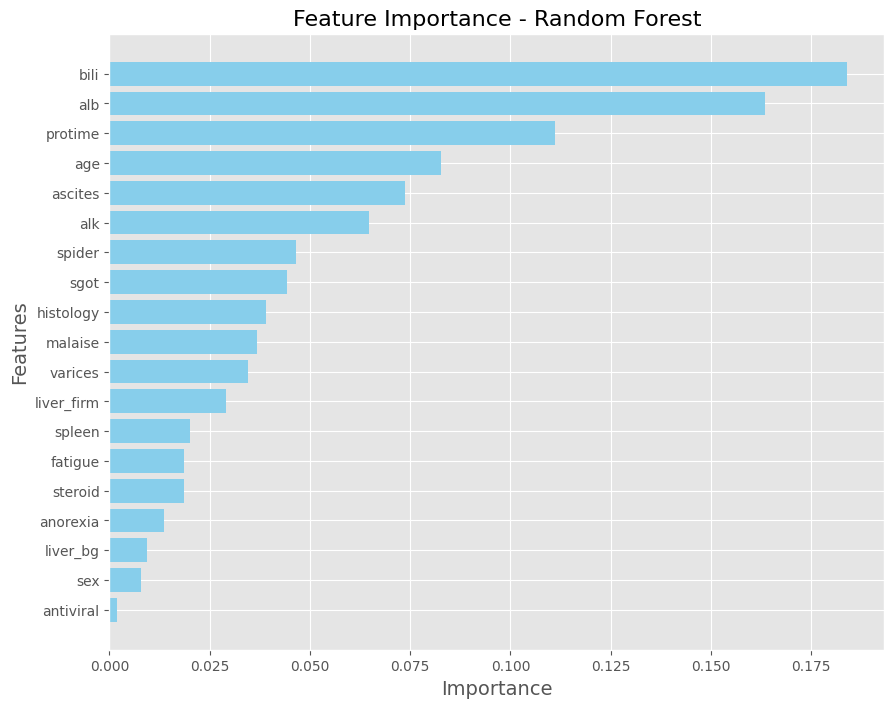

In [59]:
# Assume that 'features' is a list of feature names in the order they were given to the model
features = X_train.columns.tolist()

# Fit the model
rf.fit(X_train, y_train)

# Extract feature importances
importances = rf.feature_importances_

# Create a DataFrame to display the features and their importances
importances_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

# Sort the DataFrame by importance in descending order
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Display the DataFrame
print(importances_df)

#plot
plt.figure(figsize=(10, 8))
plt.barh(importances_df['Feature'], importances_df['Importance'], color='skyblue')
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.title('Feature Importance - Random Forest', fontsize=16)
plt.gca().invert_yaxis()
plt.show()

TEST

In [60]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score

# Retraining the model and making predictions as before
rf.fit(X_train, y_train)
rfpred = rf.predict(X_test)

# Computing the evaluation metrics on the test set
test_accuracy = accuracy_score(y_test, rfpred)
test_f1 = f1_score(y_test, rfpred)
test_recall = recall_score(y_test, rfpred)
test_precision = precision_score(y_test, rfpred)
test_roc_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

# Storing the evaluation metrics in the dataframe
data = [test_accuracy, test_f1, test_recall, test_precision, test_roc_auc, "Random Forest", "No"]
testDF.loc[len(testDF)] = data

# Repeat the same steps for the model trained on resampled data
rf.fit(X_res, y_res)
xgbpred = rf.predict(X_test)

test_accuracy_res = accuracy_score(y_test, xgbpred)
test_f1_res = f1_score(y_test, xgbpred)
test_recall_res = recall_score(y_test, xgbpred)
test_precision_res = precision_score(y_test, xgbpred)
test_roc_auc_res = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

data_res = [test_accuracy_res, test_f1_res, test_recall_res, test_precision_res, test_roc_auc_res, "Random Forest", "Yes"]
testDF.loc[len(testDF)] = data_res

In [61]:
testDF

,accuracy,F1 Score,Recall,Precision,ROC AUC,Model,Resampled
0,0.935484,0.800000,0.666667,1.000000,0.953333,Random Forest,No
1,0.903226,0.769231,0.833333,0.714286,0.953333,Random Forest,Yes


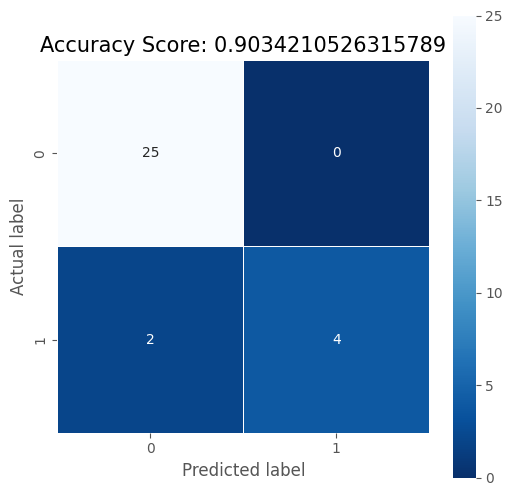

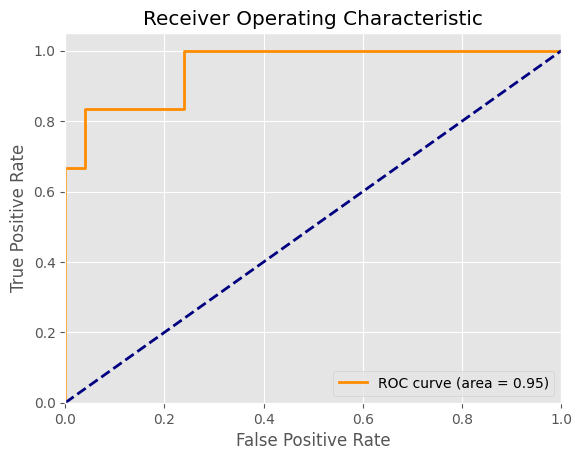

In [62]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, rfpred)

# Plot confusion matrix
plt.figure(figsize=(6,6))
sns.heatmap(cnf_matrix, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score["test_accuracy"].mean())
plt.title(all_sample_title, size = 15);
plt.show()

# Compute ROC curve and ROC area
rfpred_proba = rf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, rfpred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# Gradient Boosting Classifier

In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.1, 0.05, 0.01]
}

# Create a base model
gbc = GradientBoostingClassifier(random_state=42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = gbc, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

Fitting 5 folds for each of 27 candidates, totalling 135 fits


In [64]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'], learning_rate=best_params['learning_rate'], random_state=42)

gbc.fit(X_train, y_train)

gbcpred = gbc.predict(X_test)

score = cross_validate(gbc, X_train, y_train, cv=10, scoring=['accuracy', 'f1', 'recall', 'precision', "roc_auc"])
print("Test accuracy:{}".format(score["test_accuracy"].mean()))
data = [score["test_accuracy"].mean(), score["test_f1"].mean(), score["test_recall"].mean(), score['test_precision'].mean(),
        score["test_roc_auc"].mean(), "GradientBoosting", "No"]
scoreDF.loc[len(scoreDF)] = data

gbc.fit(X_res, y_res)

gbcpred = gbc.predict(X_test)

score = cross_validate(gbc, X_res, y_res, cv=10, scoring=['accuracy', 'f1', 'recall', 'precision', "roc_auc"])
print("Test accuracy:{}".format(score["test_accuracy"].mean()))
data = [score["test_accuracy"].mean(), score["test_f1"].mean(), score["test_recall"].mean(), score['test_precision'].mean(),
        score["test_roc_auc"].mean(), "GradientBoosting", "Yes"]
scoreDF.loc[len(scoreDF)] = data

Test accuracy:0.7666666666666667
Test accuracy:0.9031578947368419


       Feature  Importance
13        bili    0.146394
16         alb    0.130375
11     ascites    0.125771
10      spider    0.099714
12     varices    0.084266
5      malaise    0.055845
14         alk    0.050524
17     protime    0.049143
0          age    0.048512
9       spleen    0.039831
2      steroid    0.032832
8   liver_firm    0.027773
4      fatigue    0.027442
15        sgot    0.025111
6     anorexia    0.021191
7     liver_bg    0.012867
1          sex    0.010836
18   histology    0.010597
3    antiviral    0.000978


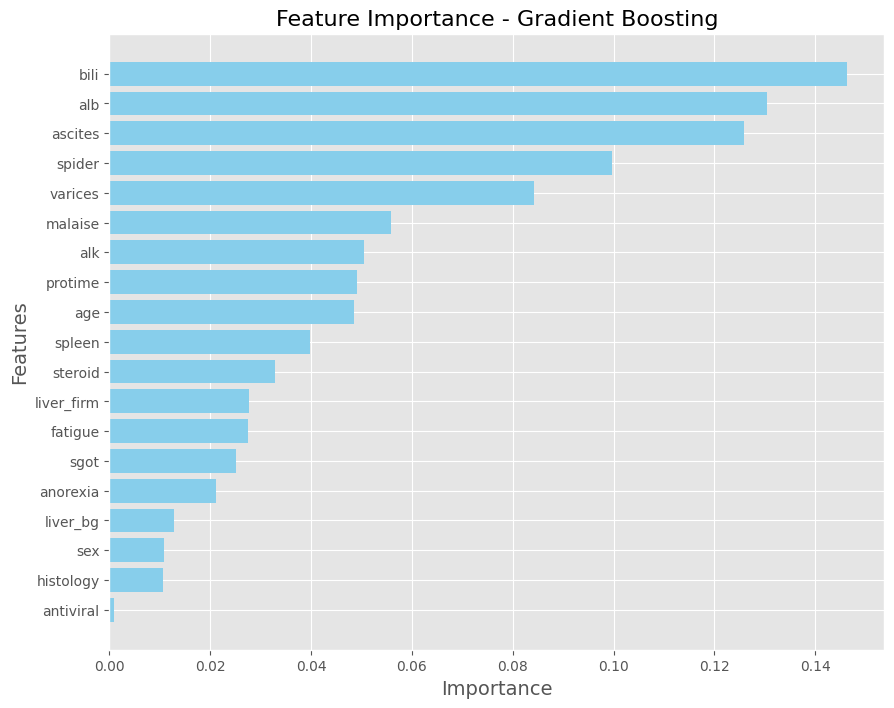

In [65]:
# Assume that 'features' is a list of feature names in the order they were given to the model
features = X_train.columns.tolist()

# Fit the model
gbc.fit(X_train, y_train)

# Extract feature importances
importances = rf.feature_importances_

# Create a DataFrame to display the features and their importances
importances_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

# Sort the DataFrame by importance in descending order
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Display the DataFrame
print(importances_df)

#plot
plt.figure(figsize=(10, 8))
plt.barh(importances_df['Feature'], importances_df['Importance'], color='skyblue')
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.title('Feature Importance - Gradient Boosting', fontsize=16)
plt.gca().invert_yaxis()
plt.show()

TEST

In [66]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score

# Retraining the model and making predictions as before
gbc.fit(X_train, y_train)
gbcpred = gbc.predict(X_test)

# Computing the evaluation metrics on the test set
test_accuracy = accuracy_score(y_test, gbcpred)
test_f1 = f1_score(y_test, gbcpred)
test_recall = recall_score(y_test, gbcpred)
test_precision = precision_score(y_test, gbcpred)
test_roc_auc = roc_auc_score(y_test, gbc.predict_proba(X_test)[:, 1])

# Storing the evaluation metrics in the dataframe
data = [test_accuracy, test_f1, test_recall, test_precision, test_roc_auc, "GBC", "No"]
testDF.loc[len(testDF)] = data

# Repeat the same steps for the model trained on resampled data
gbc.fit(X_res, y_res)
gbcpred_res = gbc.predict(X_test)

test_accuracy_res = accuracy_score(y_test, gbcpred_res)
test_f1_res = f1_score(y_test, gbcpred_res)
test_recall_res = recall_score(y_test, gbcpred_res)
test_precision_res = precision_score(y_test, gbcpred_res)
test_roc_auc_res = roc_auc_score(y_test, gbc.predict_proba(X_test)[:, 1])

data_res = [test_accuracy_res, test_f1_res, test_recall_res, test_precision_res, test_roc_auc_res, "GBC", "Yes"]
testDF.loc[len(testDF)] = data_res


In [67]:
print(testDF)

   accuracy  F1 Score    Recall  Precision   ROC AUC          Model Resampled
0  0.935484  0.800000  0.666667   1.000000  0.953333  Random Forest        No
1  0.903226  0.769231  0.833333   0.714286  0.953333  Random Forest       Yes
2  0.774194  0.461538  0.500000   0.428571  0.840000            GBC        No
3  0.741935  0.428571  0.500000   0.375000  0.880000            GBC       Yes


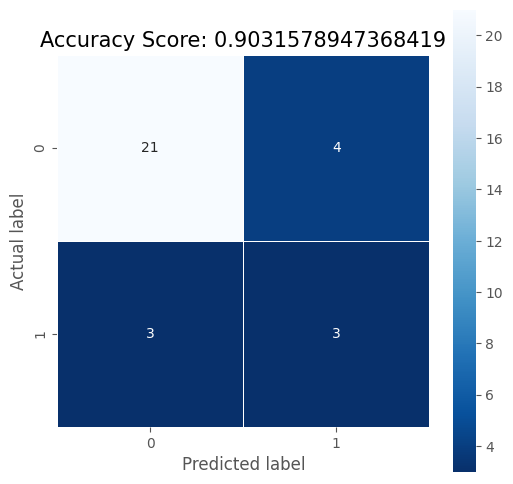

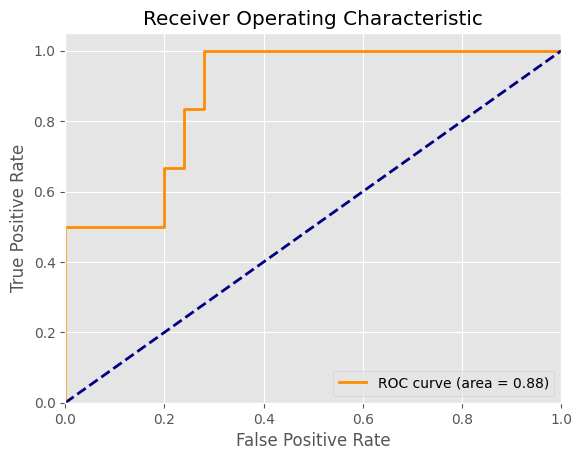

In [68]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, gbcpred)

# Plot confusion matrix
plt.figure(figsize=(6,6))
sns.heatmap(cnf_matrix, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score["test_accuracy"].mean())
plt.title(all_sample_title, size = 15);
plt.show()

# Compute ROC curve and ROC area
gbcpred_proba = gbc.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, gbcpred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Logistic Regression

#### Reasoning: curious to see how it performs; data has been normalized

In [69]:
#Grid search 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

logreg = LogisticRegression(random_state=42)

grid_search = GridSearchCV(estimator = logreg, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 2)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [70]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=best_params['C'], penalty=best_params['penalty'], random_state=42)

lr.fit(X_train, y_train)

lrpred = lr.predict(X_test)

score = cross_validate(lr, X_train, y_train, cv=10, scoring=['accuracy', 'f1', 'recall', 'precision', "roc_auc"])
print("Test accuracy:{}".format(score["test_accuracy"].mean()))
data = [score["test_accuracy"].mean(), score["test_f1"].mean(), score["test_recall"].mean(), score['test_precision'].mean(),
        score["test_roc_auc"].mean(), "LogisticRegression", "No"]
scoreDF.loc[len(scoreDF)] = data

lr.fit(X_res, y_res)

lrpred = lr.predict(X_test)

score = cross_validate(lr, X_res, y_res, cv=10, scoring=['accuracy', 'f1', 'recall', 'precision', "roc_auc"])
print("Test accuracy:{}".format(score["test_accuracy"].mean()))
data = [score["test_accuracy"].mean(), score["test_f1"].mean(), score["test_recall"].mean(), score['test_precision'].mean(),
        score["test_roc_auc"].mean(), "LogisticRegression", "Yes"]
scoreDF.loc[len(scoreDF)] = data

Test accuracy:0.7993589743589744
Test accuracy:0.898421052631579


TEST

In [71]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score

# Retraining the model and making predictions as before
lr.fit(X_train, y_train)
lrpred = lr.predict(X_test)

# Computing the evaluation metrics on the test set
test_accuracy = accuracy_score(y_test, lrpred)
test_f1 = f1_score(y_test, lrpred)
test_recall = recall_score(y_test, lrpred)
test_precision = precision_score(y_test, lrpred)
test_roc_auc = roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])

# Storing the evaluation metrics in the dataframe
data = [test_accuracy, test_f1, test_recall, test_precision, test_roc_auc, "Logistic", "No"]
testDF.loc[len(testDF)] = data

# Repeat the same steps for the model trained on resampled data
lr.fit(X_res, y_res)
lrpred_res = gbc.predict(X_test)

test_accuracy_res = accuracy_score(y_test, lrpred_res)
test_f1_res = f1_score(y_test, lrpred_res)
test_recall_res = recall_score(y_test, lrpred_res)
test_precision_res = precision_score(y_test, lrpred_res)
test_roc_auc_res = roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])

data_res = [test_accuracy_res, test_f1_res, test_recall_res, test_precision_res, test_roc_auc_res, "Logistic", "Yes"]
testDF.loc[len(testDF)] = data_res

In [72]:
print(testDF)

   accuracy  F1 Score    Recall  Precision   ROC AUC          Model Resampled
0  0.935484  0.800000  0.666667   1.000000  0.953333  Random Forest        No
1  0.903226  0.769231  0.833333   0.714286  0.953333  Random Forest       Yes
2  0.774194  0.461538  0.500000   0.428571  0.840000            GBC        No
3  0.741935  0.428571  0.500000   0.375000  0.880000            GBC       Yes
4  0.935484  0.800000  0.666667   1.000000  0.940000       Logistic        No
5  0.741935  0.428571  0.500000   0.375000  0.906667       Logistic       Yes


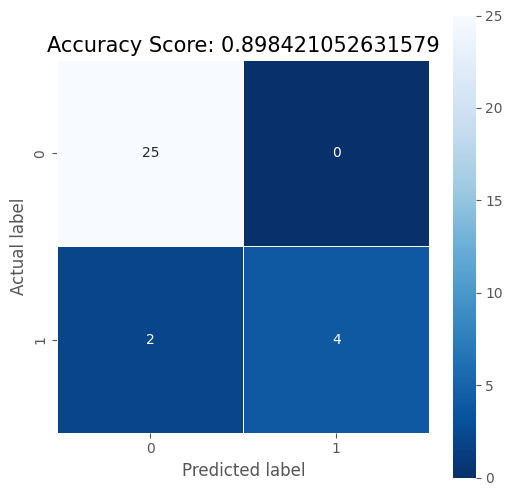

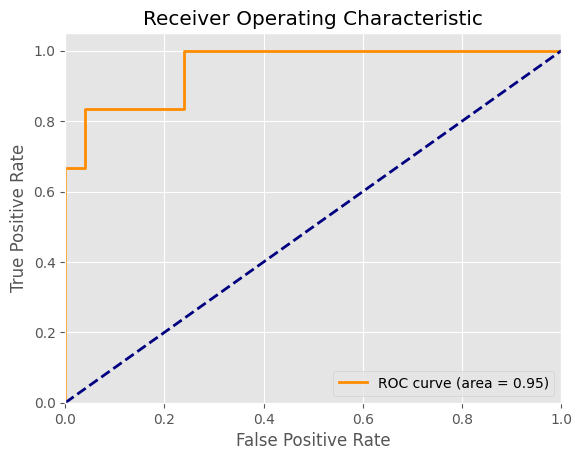

In [73]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, lrpred)

# Plot confusion matrix
plt.figure(figsize=(6,6))
sns.heatmap(cnf_matrix, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score["test_accuracy"].mean())
plt.title(all_sample_title, size = 15);
plt.show()

# Compute ROC curve and ROC area
lrpred_proba = rf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, lrpred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# XG Boost

In [74]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.1, 0.05, 0.01]
}

xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

grid_search = GridSearchCV(estimator = xgb, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 2)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

Fitting 5 folds for each of 27 candidates, totalling 135 fits


In [75]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'], learning_rate=best_params['learning_rate'], random_state=42, use_label_encoder=False, eval_metric='logloss')

xgb.fit(X_train, y_train)

xgbpred = xgb.predict(X_test)

score = cross_validate(xgb, X_train, y_train, cv=10, scoring=['accuracy', 'f1', 'recall', 'precision', "roc_auc"])
print("Test accuracy:{}".format(score["test_accuracy"].mean()))
data = [score["test_accuracy"].mean(), score["test_f1"].mean(), score["test_recall"].mean(), score['test_precision'].mean(),
        score["test_roc_auc"].mean(), "XGBoost", "No"]
scoreDF.loc[len(scoreDF)] = data

xgb.fit(X_res, y_res)

xgbpred = xgb.predict(X_test)
xgbpred_proba = xgb.predict_proba(X_test)[:, 1]

score = cross_validate(xgb, X_res, y_res, cv=10, scoring=['accuracy', 'f1', 'recall', 'precision', "roc_auc"])
print("Test accuracy:{}".format(score["test_accuracy"].mean()))
data = [score["test_accuracy"].mean(), score["test_f1"].mean(), score["test_recall"].mean(), score['test_precision'].mean(),
        score["test_roc_auc"].mean(), "XGBoost", "Yes"]
scoreDF.loc[len(scoreDF)] = data

Test accuracy:0.8076923076923077
Test accuracy:0.9044736842105264


EVALUATION ON TEST SET

In [76]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score

# Retraining the model and making predictions as before
xgb.fit(X_train, y_train)
xgbpred = xgb.predict(X_test)

# Computing the evaluation metrics on the test set
test_accuracy = accuracy_score(y_test, xgbpred)
test_f1 = f1_score(y_test, xgbpred)
test_recall = recall_score(y_test, xgbpred)
test_precision = precision_score(y_test, xgbpred)
test_roc_auc = roc_auc_score(y_test, xgb.predict_proba(X_test)[:, 1])

# Storing the evaluation metrics in the dataframe
data = [test_accuracy, test_f1, test_recall, test_precision, test_roc_auc, "XGBoost", "No"]
testDF.loc[len(testDF)] = data

# Repeat the same steps for the model trained on resampled data
xgb.fit(X_res, y_res)
xgbpred = xgb.predict(X_test)

test_accuracy_res = accuracy_score(y_test, xgbpred)
test_f1_res = f1_score(y_test, xgbpred)
test_recall_res = recall_score(y_test, xgbpred)
test_precision_res = precision_score(y_test, xgbpred)
test_roc_auc_res = roc_auc_score(y_test, xgb.predict_proba(X_test)[:, 1])

data_res = [test_accuracy_res, test_f1_res, test_recall_res, test_precision_res, test_roc_auc_res, "XGBoost", "Yes"]
testDF.loc[len(testDF)] = data_res

In [77]:
testDF

,accuracy,F1 Score,Recall,Precision,ROC AUC,Model,Resampled
0,0.935484,0.800000,0.666667,1.000000,0.953333,Random Forest,No
1,0.903226,0.769231,0.833333,0.714286,0.953333,Random Forest,Yes
2,0.774194,0.461538,0.500000,0.428571,0.840000,GBC,No
3,0.741935,0.428571,0.500000,0.375000,0.880000,GBC,Yes
4,0.935484,0.800000,0.666667,1.000000,0.940000,Logistic,No
5,0.741935,0.428571,0.500000,0.375000,0.906667,Logistic,Yes
6,0.806452,0.500000,0.500000,0.500000,0.873333,XGBoost,No
7,0.838710,0.666667,0.833333,0.555556,0.793333,XGBoost,Yes


       Feature  Importance
11     ascites    0.253370
9       spleen    0.096392
16         alb    0.093087
1          sex    0.080855
13        bili    0.077715
17     protime    0.068313
10      spider    0.067046
5      malaise    0.047244
8   liver_firm    0.045445
14         alk    0.037870
18   histology    0.035265
2      steroid    0.027674
0          age    0.025011
15        sgot    0.024368
4      fatigue    0.010851
6     anorexia    0.009494
7     liver_bg    0.000000
12     varices    0.000000
3    antiviral    0.000000


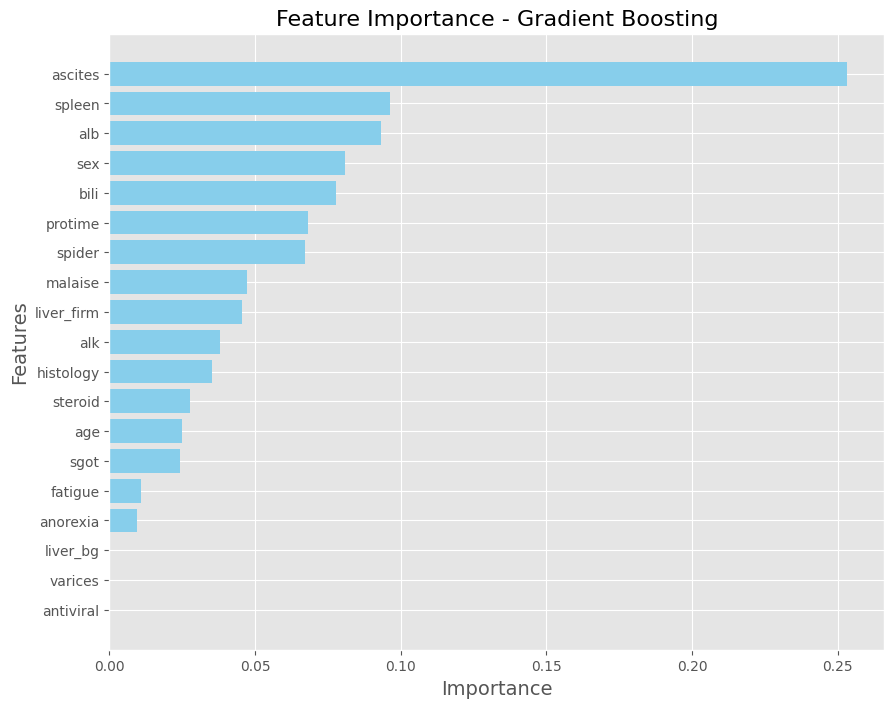

In [78]:
# Assume that 'features' is a list of feature names in the order they were given to the model
features = X_train.columns.tolist()

# Fit the model
xgb.fit(X_train, y_train)

# Extract feature importances
importances = xgb.feature_importances_

# Create a DataFrame to display the features and their importances
importances_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

# Sort the DataFrame by importance in descending order
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Display the DataFrame
print(importances_df)

#plot
plt.figure(figsize=(10, 8))
plt.barh(importances_df['Feature'], importances_df['Importance'], color='skyblue')
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.title('Feature Importance - Gradient Boosting', fontsize=16)
plt.gca().invert_yaxis()
plt.show()

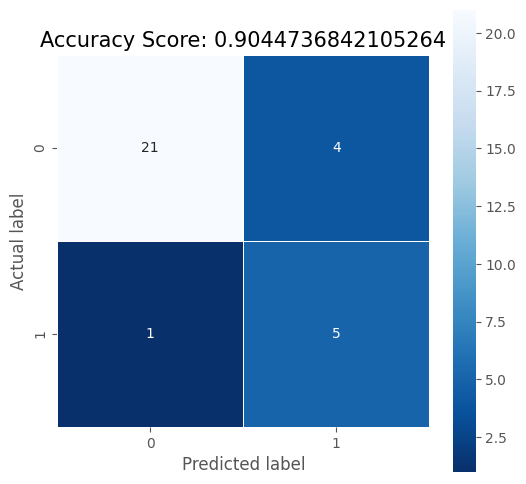

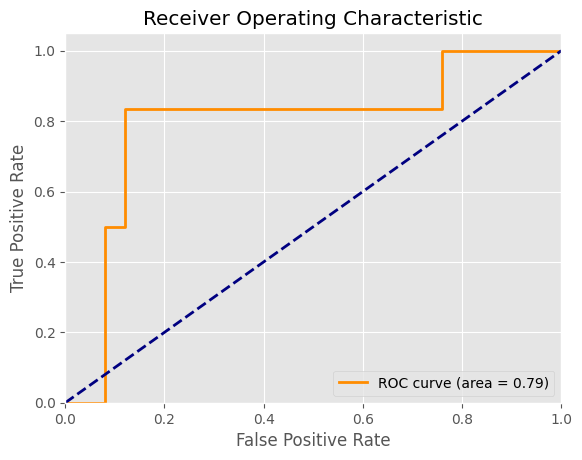

In [79]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, xgbpred)

# Plot confusion matrix
plt.figure(figsize=(6,6))
sns.heatmap(cnf_matrix, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score["test_accuracy"].mean())
plt.title(all_sample_title, size = 15);
plt.show()

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, xgbpred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Naive Bayes
#### Reasoning: small dataset; NB has demonstrated superior performance when compared to DL (require large datasets) or log reg. (discriminative and overfits with smaller datasets)

In [80]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB 
gnb = GaussianNB()
gnb.fit(X_train,y_train)

gnbpredict = gnb.predict(X_test)

score = cross_validate(gnb, X_train, y_train, cv=10, scoring=['accuracy', 'f1', 'recall', 'precision', "roc_auc"])
print("Test accuracy:{}".format(score["test_accuracy"].mean()))
data = [score["test_accuracy"].mean(), score["test_f1"].mean(), score["test_recall"].mean(), score['test_precision'].mean(),
        score["test_roc_auc"].mean(), "NaiveBayes", "No"]
scoreDF.loc[len(scoreDF)] = data

gnb = GaussianNB()
gnb.fit(X_res,y_res)

gnbpredict = gnb.predict(X_test)

score = cross_validate(gnb, X_res, y_res, cv=10, scoring=['accuracy', 'f1', 'recall', 'precision', "roc_auc"])
print("Test accuracy:{}".format(score["test_accuracy"].mean()))
data = [score["test_accuracy"].mean(), score["test_f1"].mean(), score["test_recall"].mean(), score['test_precision'].mean(),
        score["test_roc_auc"].mean(), "NaiveBayes", "Yes"]
scoreDF.loc[len(scoreDF)] = data

Test accuracy:0.7102564102564102
Test accuracy:0.8071052631578948


# SVM

#### Reasoning: Handles outliers well when compared to similar algos. (i.e., KNN) when there are several features with less data

In [81]:
from sklearn.svm import SVC

svc_model1 = SVC(kernel="poly", C=1,gamma="auto")
svc_model2 = SVC(kernel="rbf", C=1,gamma="auto")
svc_model3 = SVC(kernel="sigmoid", C=1,gamma="auto")
svc_model4 = SVC(kernel="linear", C=1,gamma="auto")

score = cross_validate(svc_model1, X_res, y_res, cv=10, scoring=['accuracy', 'f1','recall',"roc_auc"])
print("Test accuracy of Poly Kernal:{}".format(score["test_accuracy"].mean()))
score = cross_validate(svc_model2, X_res, y_res, cv=10, scoring=['accuracy', 'f1','recall',"roc_auc"])
print("Test accuracy of rbf Kernal:{}".format(score["test_accuracy"].mean()))
score = cross_validate(svc_model3, X_res, y_res, cv=10, scoring=['accuracy', 'f1','recall',"roc_auc"])
print("Test accuracy of sigmoid Kernal:{}".format(score["test_accuracy"].mean()))
score = cross_validate(svc_model4, X_res, y_res, cv=10, scoring=['accuracy', 'f1','recall',"roc_auc"])
print("Test accuracy of linear Kernal:{}".format(score["test_accuracy"].mean()))

Test accuracy of Poly Kernal:0.8215789473684211
Test accuracy of rbf Kernal:0.8881578947368421
Test accuracy of sigmoid Kernal:0.8573684210526317
Test accuracy of linear Kernal:0.9086842105263159


In [82]:
svc=SVC(kernel="rbf",gamma="auto", C=1) # The default kernel used by SVC is the gaussian kernel
svc.fit(X_train, y_train)
SVMprediction = svc.predict(X_test)

score = cross_validate(svc, X_train, y_train, cv=10, scoring=['accuracy', 'f1', 'recall', 'precision', "roc_auc"])
print("Test accuracy:{}".format(score["test_accuracy"].mean()))
data = [score["test_accuracy"].mean(), score["test_f1"].mean(), score["test_recall"].mean(), score['test_precision'].mean(),
        score["test_roc_auc"].mean(), "SVM", "No"]
scoreDF.loc[len(scoreDF)] = data


svc.fit(X_res,y_res)
SVMprediction = svc.predict(X_test)

score = cross_validate(svc, X_res, y_res, cv=10, scoring=['accuracy', 'f1', 'recall', 'precision', "roc_auc"])
print("Test accuracy:{}".format(score["test_accuracy"].mean()))
data = [score["test_accuracy"].mean(), score["test_f1"].mean(), score["test_recall"].mean(), score['test_precision'].mean(),
        score["test_roc_auc"].mean(), "SVM", "Yes"]
scoreDF.loc[len(scoreDF)] = data

Test accuracy:0.823076923076923
Test accuracy:0.8881578947368421


In [83]:
scoreDF

,accuracy,f1,recall,precision,roc_auc,type,balance
0,0.809615,0.440000,0.433333,0.516667,0.696667,DecisionTree,No
1,0.887895,0.866402,0.830000,0.947778,0.899333,DecisionTree,Yes
2,0.823077,0.394286,0.383333,0.450000,0.855741,RandomForest,No
3,0.903421,0.905710,0.930000,0.888741,0.972667,RandomForest,Yes
4,0.766667,0.313810,0.283333,0.383333,0.816667,GradientBoosting,No
5,0.903158,0.901916,0.908889,0.908586,0.922889,GradientBoosting,Yes
6,0.799359,0.460952,0.433333,0.566667,0.811667,LogisticRegression,No
7,0.898421,0.901865,0.928889,0.884040,0.932444,LogisticRegression,Yes
8,0.807692,0.445476,0.416667,0.560000,0.788704,XGBoost,No
9,0.904474,0.893582,0.900000,0.906061,0.964889,XGBoost,Yes


TEST

In [84]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score

# Retraining the model and making predictions as before
svc.fit(X_train, y_train)
SVMprediction = svc.predict(X_test)

# Computing the evaluation metrics on the test set
test_accuracy = accuracy_score(y_test, SVMprediction)
test_f1 = f1_score(y_test, SVMprediction)
test_recall = recall_score(y_test, SVMprediction)
test_precision = precision_score(y_test, SVMprediction)
test_roc_auc = roc_auc_score(y_test, svc.decision_function(X_test))

# Storing the evaluation metrics in the dataframe
data = [test_accuracy, test_f1, test_recall, test_precision, test_roc_auc, "SVC", "No"]
testDF.loc[len(testDF)] = data

# Repeat the same steps for the model trained on resampled data
svc.fit(X_res, y_res)
SVMprediction_res = svc.predict(X_test)

test_accuracy_res = accuracy_score(y_test, SVMprediction_res)
test_f1_res = f1_score(y_test, SVMprediction_res)
test_recall_res = recall_score(y_test, SVMprediction_res)
test_precision_res = precision_score(y_test, SVMprediction_res)
test_roc_auc_res = roc_auc_score(y_test, svc.decision_function(X_test))

data_res = [test_accuracy_res, test_f1_res, test_recall_res, test_precision_res, test_roc_auc_res, "SVC", "Yes"]
testDF.loc[len(testDF)] = data_res

In [85]:
testDF

,accuracy,F1 Score,Recall,Precision,ROC AUC,Model,Resampled
0,0.935484,0.800000,0.666667,1.000000,0.953333,Random Forest,No
1,0.903226,0.769231,0.833333,0.714286,0.953333,Random Forest,Yes
2,0.774194,0.461538,0.500000,0.428571,0.840000,GBC,No
3,0.741935,0.428571,0.500000,0.375000,0.880000,GBC,Yes
4,0.935484,0.800000,0.666667,1.000000,0.940000,Logistic,No
5,0.741935,0.428571,0.500000,0.375000,0.906667,Logistic,Yes
6,0.806452,0.500000,0.500000,0.500000,0.873333,XGBoost,No
7,0.838710,0.666667,0.833333,0.555556,0.793333,XGBoost,Yes
8,0.903226,0.666667,0.500000,1.000000,0.900000,SVC,No
9,0.741935,0.555556,0.833333,0.416667,0.953333,SVC,Yes


# KNN

#### Reasoning: ideal for classification and regression problems, easy to understand and use, effective for smaller datasets

The optimal number of neighbors [unbalance dataset] is 3
The optimal score is 0.86


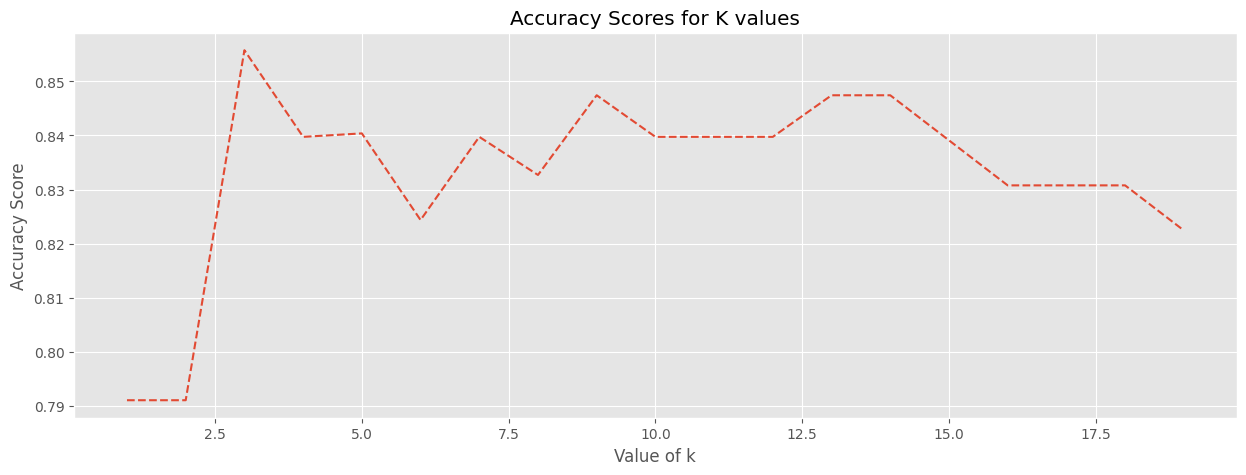

In [87]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
scores=[]
lrange=list(range(1,20))
for k in lrange:
    knn=KNeighborsClassifier(n_neighbors=k, weights='distance', algorithm='auto')
    score = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    scores.append(score.mean())

optimal_k = lrange[scores.index(max(scores))]
print("The optimal number of neighbors [unbalance dataset] is %d" % optimal_k)
print("The optimal score is %.2f" % max(scores))

plt.figure(2,figsize=(15,5))
plt.plot(lrange, scores,ls='dashed')
plt.xlabel('Value of k')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for K values')
plt.show()

The optimal number of neighbors [balance dataset] is 1
The optimal score is 0.89


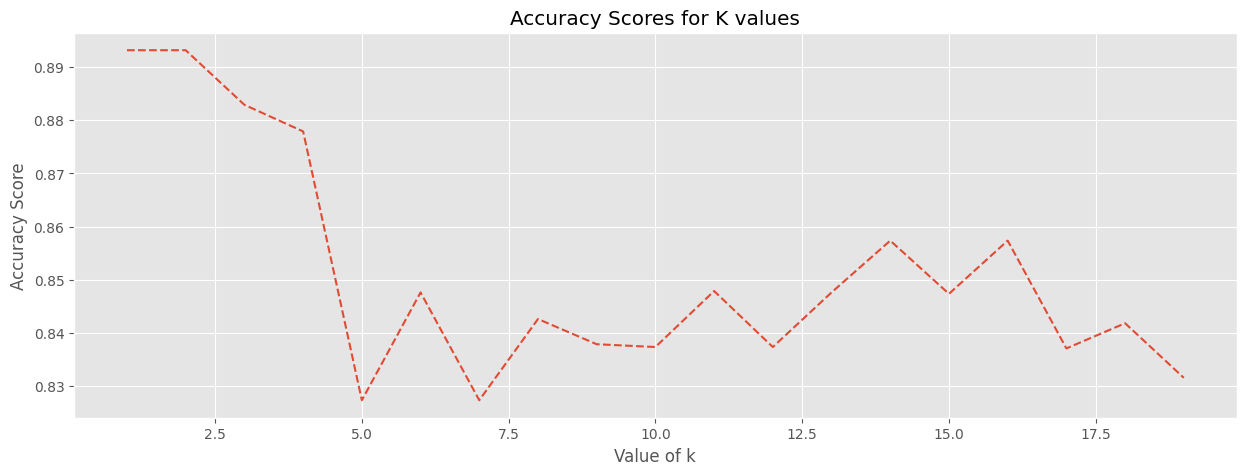

In [88]:
scores=[]
lrange=list(range(1,20))
for k in lrange:
    knn=KNeighborsClassifier(n_neighbors=k, weights='distance', algorithm='auto')
    score = cross_val_score(knn, X_res, y_res, cv=10, scoring='accuracy')
    scores.append(score.mean())

optimal_k = lrange[scores.index(max(scores))]
print("The optimal number of neighbors [balance dataset] is %d" % optimal_k)
print("The optimal score is %.2f" % max(scores))

plt.figure(2,figsize=(15,5))
plt.plot(lrange, scores,ls='dashed')
plt.xlabel('Value of k')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for K values')
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Initialize the KNN classifier
knn = KNeighborsClassifier()

# Lists to store the training and validation accuracies
train_accuracies = []
val_accuracies = []
n_neighbors = range(1, 21)  # Vary the number of neighbors from 1 to 20

# Loop through different number of neighbors
for n in n_neighbors:
    # Fit the KNN classifier with the training data
    knn.set_params(n_neighbors=n)
    knn.fit(X_train, y_train)
    
    # Calculate training accuracy
    train_accuracy = knn.score(X_train, y_train)
    train_accuracies.append(train_accuracy)
    
    # Calculate validation accuracy using cross-validation
    val_accuracy = np.mean(cross_val_score(knn, X_train, y_train, cv=10))
    val_accuracies.append(val_accuracy)

# Plot the training and validation accuracies against the number of neighbors
plt.plot(n_neighbors, train_accuracies, label='Training Accuracy')
plt.plot(n_neighbors, val_accuracies, label='Validation Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('KNN Model Complexity')
plt.legend()
plt.show()

In [ ]:
knn = KNeighborsClassifier()

# Lists to store the training and validation accuracies
train_accuracies = []
val_accuracies = []
n_neighbors = range(1, 21)  # Vary the number of neighbors from 1 to 20

# Loop through different number of neighbors
for n in n_neighbors:
    # Fit the KNN classifier with the training data
    knn.set_params(n_neighbors=n)
    knn.fit(X_res, y_res)
    
    # Calculate training accuracy
    train_accuracy = knn.score(X_res, y_res)
    train_accuracies.append(train_accuracy)
    
    # Calculate validation accuracy using cross-validation
    val_accuracy = np.mean(cross_val_score(knn, X_res, y_res, cv=10))
    val_accuracies.append(val_accuracy)

# Plot the training and validation accuracies against the number of neighbors
plt.plot(n_neighbors, train_accuracies, label='Training Accuracy')
plt.plot(n_neighbors, val_accuracies, label='Validation Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('KNN Model Complexity')
plt.legend()
plt.show()

# Performance comparison

In [91]:
scoreDF

,accuracy,f1,recall,precision,roc_auc,type,balance
0,0.809615,0.440000,0.433333,0.516667,0.696667,DecisionTree,No
1,0.887895,0.866402,0.830000,0.947778,0.899333,DecisionTree,Yes
2,0.823077,0.394286,0.383333,0.450000,0.855741,RandomForest,No
3,0.903421,0.905710,0.930000,0.888741,0.972667,RandomForest,Yes
4,0.766667,0.313810,0.283333,0.383333,0.816667,GradientBoosting,No
5,0.903158,0.901916,0.908889,0.908586,0.922889,GradientBoosting,Yes
6,0.799359,0.460952,0.433333,0.566667,0.811667,LogisticRegression,No
7,0.898421,0.901865,0.928889,0.884040,0.932444,LogisticRegression,Yes
8,0.807692,0.445476,0.416667,0.560000,0.788704,XGBoost,No
9,0.904474,0.893582,0.900000,0.906061,0.964889,XGBoost,Yes


[Text(0, 0, 'DecisionTree'),
 Text(1, 0, 'RandomForest'),
 Text(2, 0, 'GradientBoosting'),
 Text(3, 0, 'LogisticRegression'),
 Text(4, 0, 'XGBoost'),
 Text(5, 0, 'NaiveBayes'),
 Text(6, 0, 'SVM')]

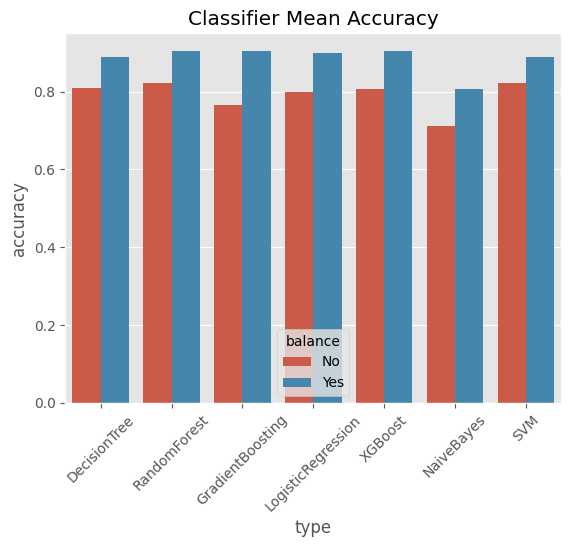

In [92]:
accurBar = sns.barplot(x='type',y='accuracy',data=scoreDF, hue="balance")
accurBar.set_title("Classifier Mean Accuracy")
accurBar.set_xticklabels(accurBar.get_xticklabels(), rotation=45)

[Text(0, 0, 'DecisionTree'),
 Text(1, 0, 'RandomForest'),
 Text(2, 0, 'GradientBoosting'),
 Text(3, 0, 'LogisticRegression'),
 Text(4, 0, 'XGBoost'),
 Text(5, 0, 'NaiveBayes'),
 Text(6, 0, 'SVM')]

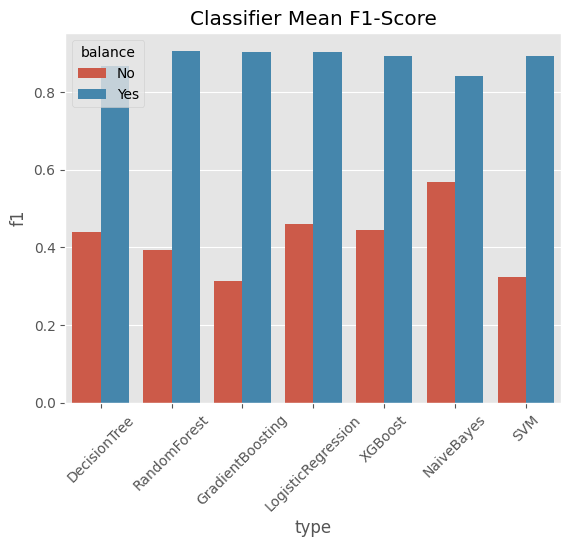

In [93]:
f1Bar = sns.barplot(x='type',y='f1',data=scoreDF, hue="balance");
f1Bar.set_title("Classifier Mean F1-Score")
f1Bar.set_xticklabels(accurBar.get_xticklabels(), rotation=45)

[Text(0, 0, 'DecisionTree'),
 Text(1, 0, 'RandomForest'),
 Text(2, 0, 'GradientBoosting'),
 Text(3, 0, 'LogisticRegression'),
 Text(4, 0, 'XGBoost'),
 Text(5, 0, 'NaiveBayes'),
 Text(6, 0, 'SVM')]

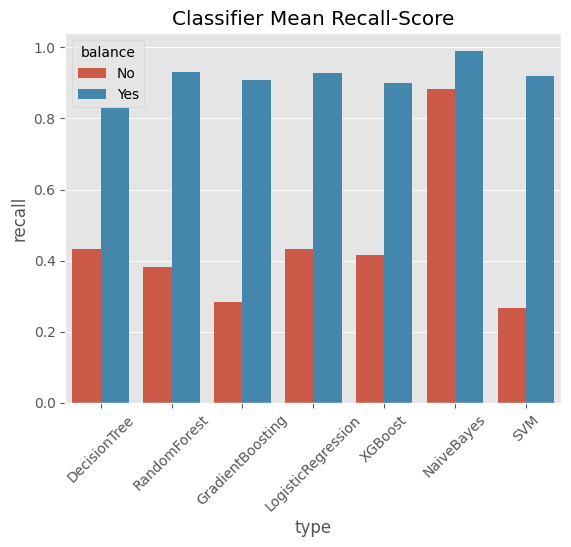

In [94]:
recallBar = sns.barplot(x='type',y='recall',data=scoreDF, hue="balance");
recallBar.set_title("Classifier Mean Recall-Score")
recallBar.set_xticklabels(accurBar.get_xticklabels(), rotation=45)

[Text(0, 0, 'DecisionTree'),
 Text(1, 0, 'RandomForest'),
 Text(2, 0, 'GradientBoosting'),
 Text(3, 0, 'LogisticRegression'),
 Text(4, 0, 'XGBoost'),
 Text(5, 0, 'NaiveBayes'),
 Text(6, 0, 'SVM')]

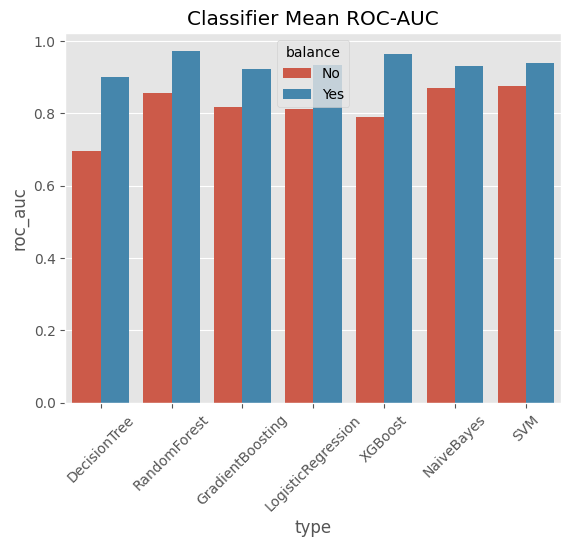

In [95]:
rocPlot = sns.barplot(x='type',y='roc_auc',data=scoreDF, hue="balance");
rocPlot.set_title("Classifier Mean ROC-AUC")
rocPlot.set_xticklabels(accurBar.get_xticklabels(), rotation=45)

In [ ]:
scoreDF

# Conclusions

#### The Random Forest Classifier performs best

#### 1. High recall percentage (0.93)
#### 2. Highest F1 score (0.91)
#### 3. Highest ROC AUC score (0.97)